In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM,GRU

# 1- Target variable

In [2]:
# daily_data_target = xr.open_dataset('./Processed_data/TmaxTS_19802021_clim19902020.nc')
# daily_data_target = xr.open_dataset('./Processed_data/t2max_lakeComo.nc')
# daily_data_target = xr.open_dataset('./Processed_data/TmaxTS_19802022_clim19932016_gridcells2.nc')

daily_data_target = xr.open_dataset('../Processed_data/Resolution_0_5/TmaxTS_19502022_clim19812010_summer_ERA5_fixedclim.nc')

In [3]:
Valle_HWocc_conc = daily_data_target.Valle_HWocc.stack(time=('year', 'day'))
month_values = np.where(Valle_HWocc_conc['day'] <= 30, 5,
                        np.where(Valle_HWocc_conc['day'] <= 60, 6,
                        np.where(Valle_HWocc_conc['day'] <= 91, 7, 8)))

day_of_month =np.tile(np.concatenate([np.arange(1, 32), np.arange(1, 31), np.arange(1, 32), np.arange(1, 32)]), 123) 
formatted_dates = [f"{year}{month}{day}" for year, month, day in zip((Valle_HWocc_conc['year']+1950).values.astype(str), np.char.zfill(month_values.astype(str), 2), np.char.zfill(day_of_month.astype(str), 2))]
Valle_HWocc_conc.attrs['date'] =  pd.to_datetime(formatted_dates, format='%Y%m%d')

filtered_dataset = Valle_HWocc_conc

In [2]:
target_dataset = pd.read_csv('../Processed_data/Resolution_0_5/tmax_NDQ90_LakeComo_Valle_MJJA_period19402022_clim19812010.csv')

In [3]:
target_dataset.set_index('Date',inplace=True)

In [7]:
target_dataset

Target 
Date               
1940-05-01        0
1940-05-02        0
1940-05-03        0
1940-05-04        0
1940-05-05        1
...             ...
2022-06-26        1
2022-06-27        1
2022-06-28        0
2022-06-29        0
2022-06-30        0

[5063 rows x 1 columns]

In [5]:
#put index in datetime format
target_dataset.index = pd.to_datetime(target_dataset.index, format='%Y-%m-%d')

In [6]:
# select just july data

target_dataset = target_dataset[(target_dataset.index.month == 5) | (target_dataset.index.month == 6)]

In [9]:
target_dataset.to_csv('../Predictors/Test12_low_May_June/target.csv')

In [7]:

plt.plot(daily_data_target['Target '])

KeyError: 'Target '

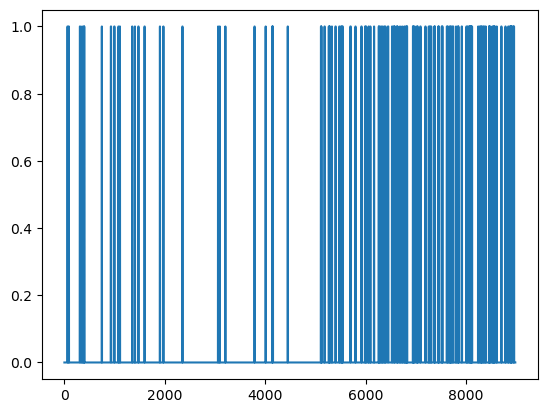

In [ ]:
plt.plot(filtered_dataset.values)

In [ ]:
# daily_data_target = daily_data_target.set_index(y='lats')
# daily_data_target = daily_data_target.set_index(x='lons')
# daily_data_target.dates.values = pd.to_datetime(daily_data_target.dates.values)


# Filter by summer months
# filtered_dataset = daily_data_target.sel(time=daily_data_target.time[daily_data_target['dates'].dt.month.isin([5,6, 7, 8, 9])])
# filtered_dataset = filtered_dataset.sel(x=9.25, y=-44.75, method='nearest')



In [ ]:
filtered_dataset

<xarray.DataArray 'Valle_HWocc' (time: 8979)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) object MultiIndex
  * year     (time) int64 0 0 0 0 0 0 0 0 0 0 ... 72 72 72 72 72 72 72 72 72 72
  * day      (time) int64 0 1 2 3 4 5 6 7 8 ... 115 116 117 118 119 120 121 122
Attributes:
    date:     DatetimeIndex(['1950-05-01', '1950-05-02', '1950-05-03', '1950-...

In [ ]:
# filtered_dataset = daily_data_target.sel(time=daily_data_target.time[daily_data_target['time'].dt.month.isin([5,6, 7, 8, 9])])

In [ ]:
# filtered_dataset.HWocc.plot()

In [ ]:
filtered_dataset

<xarray.DataArray 'Valle_HWocc' (time: 8979)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) object MultiIndex
  * year     (time) int64 0 0 0 0 0 0 0 0 0 0 ... 72 72 72 72 72 72 72 72 72 72
  * day      (time) int64 0 1 2 3 4 5 6 7 8 ... 115 116 117 118 119 120 121 122
Attributes:
    date:     DatetimeIndex(['1950-05-01', '1950-05-02', '1950-05-03', '1950-...

In [ ]:
filtered_dataset

<xarray.DataArray 'Valle_HWocc' (time: 8979)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) object MultiIndex
  * year     (time) int64 0 0 0 0 0 0 0 0 0 0 ... 72 72 72 72 72 72 72 72 72 72
  * day      (time) int64 0 1 2 3 4 5 6 7 8 ... 115 116 117 118 119 120 121 122
Attributes:
    date:     DatetimeIndex(['1950-05-01', '1950-05-02', '1950-05-03', '1950-...

In [ ]:
# target = filtered_dataset.Monte_HW.values
# target = filtered_dataset.HWocc.values

target= filtered_dataset.values
# target2 = filtered_dataset.Valle_HW.values
index = filtered_dataset.date
target_dataset = pd.DataFrame(target, index=index, columns=['Target'])

In [ ]:
target_dataset

Target
1950-05-01     0.0
1950-05-02     0.0
1950-05-03     0.0
1950-05-04     0.0
1950-05-05     0.0
...            ...
2022-08-27     0.0
2022-08-28     0.0
2022-08-29     0.0
2022-08-30     0.0
2022-08-31     0.0

[8979 rows x 1 columns]

In [ ]:
target_dataset.index.year

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', length=8979)

In [ ]:
first_year = target_dataset.index.year[0]
last_year = target_dataset.index.year[-1]

year_difference = last_year - first_year


# train_limit = round(0.80*year_difference)

train_limit = 60

train_indices = (target_dataset.index.year >=first_year) & (target_dataset.index.year <=first_year + train_limit)
test_indices = (target_dataset.index.year >first_year + train_limit) & (target_dataset.index.year <=last_year)


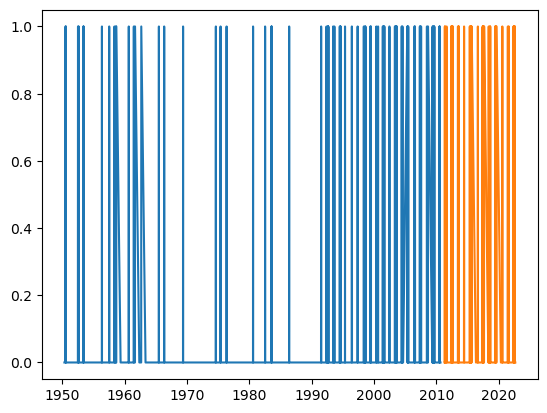

In [ ]:
train_target = target[train_indices]
test_target = target[test_indices]


index_train = index[train_indices]
index_test = index[test_indices]

plt.plot(index_train, train_target)
plt.plot(index_test, test_target)
# plt.xlim(0,1000)


# 2- Clustering

In [2]:
from functions import perform_clustering

cluster_output = 'averages'      # 'centroids' or 'averages'	

path = '../Processed_data/Resolution_0_5/'

folder = 'Test11_high'

resolution = 0.5

first_clima = 1980

last_clima = 2010  

first_year = 1950

last_year = 2010

var_num = 0

In [9]:
target_dataset.index = pd.to_datetime(target_dataset.index)

In [21]:
target_dataset[target_dataset.index.year>=first_year]

Target 
Date               
1950-05-01        0
1950-05-02        0
1950-05-03        0
1950-05-04        0
1950-05-05        0
...             ...
2022-08-27        0
2022-08-28        0
2022-08-29        1
2022-08-30        0
2022-08-31        0

[8979 rows x 1 columns]

In [23]:
target_dataset.to_csv('../Predictors/'+folder+'/target.csv')

## 1- MSL

In [9]:
#Variables
var = 'msl'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'Europe'               #World, Europe, North_Atlantic, Artic, all_but_atlantic

# Number of clusters

numbe_of_clusters = 5

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =1


Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [1412, 8630, 1354, 4382, 4085]
Index of the closest cluster center for each sample [1412, 8630, 1354, 4382, 4085]


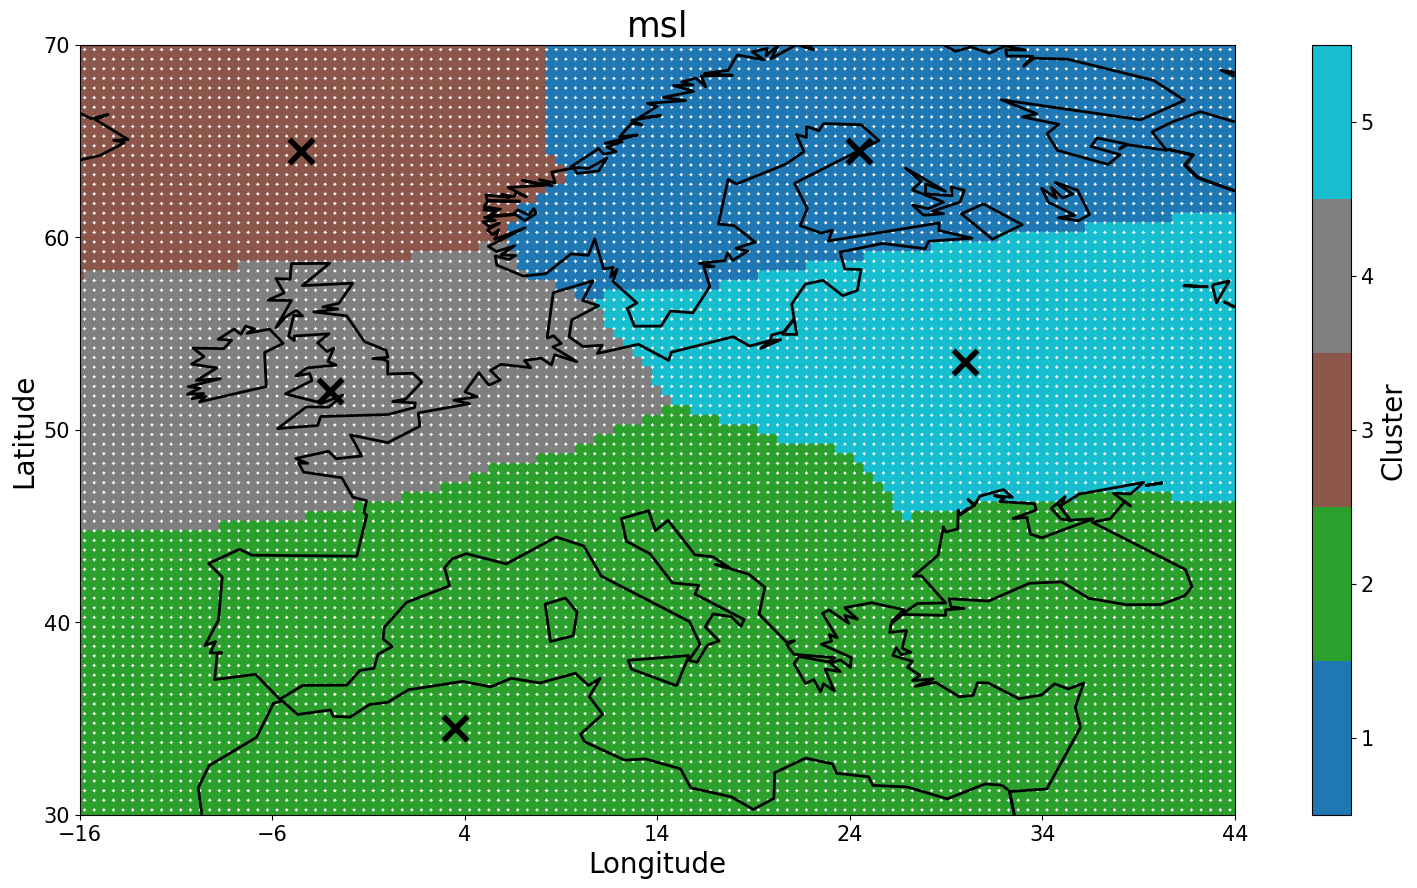

In [10]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

if cluster_output == 'centroids':
    pred_dataframe = centroids_dataframe.copy()
elif cluster_output == 'averages':
    pred_dataframe = clusters_av_dataframe.copy()

In [3]:
#Variables
var = 'msl'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'World'               #World, Europe, North_Atlantic, Artic, all_but_atlantic

# Number of clusters

numbe_of_clusters = 20

# Normalize each time series
norm = False
seasonal_soothing = True

var_num=2

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [119015, 209538, 255710, 242607, 30356, 2182, 216171, 44416, 54320, 64112, 14607, 209942, 234235, 34958, 33759, 14911, 213217, 210564, 208008, 204296]
Index of the closest cluster center for each sample [119015, 209538, 255710, 242607, 30356, 2182, 216171, 44416, 54320, 64112, 14607, 209942, 234235, 34958, 33759, 14911, 213217, 210564, 208008, 204296]


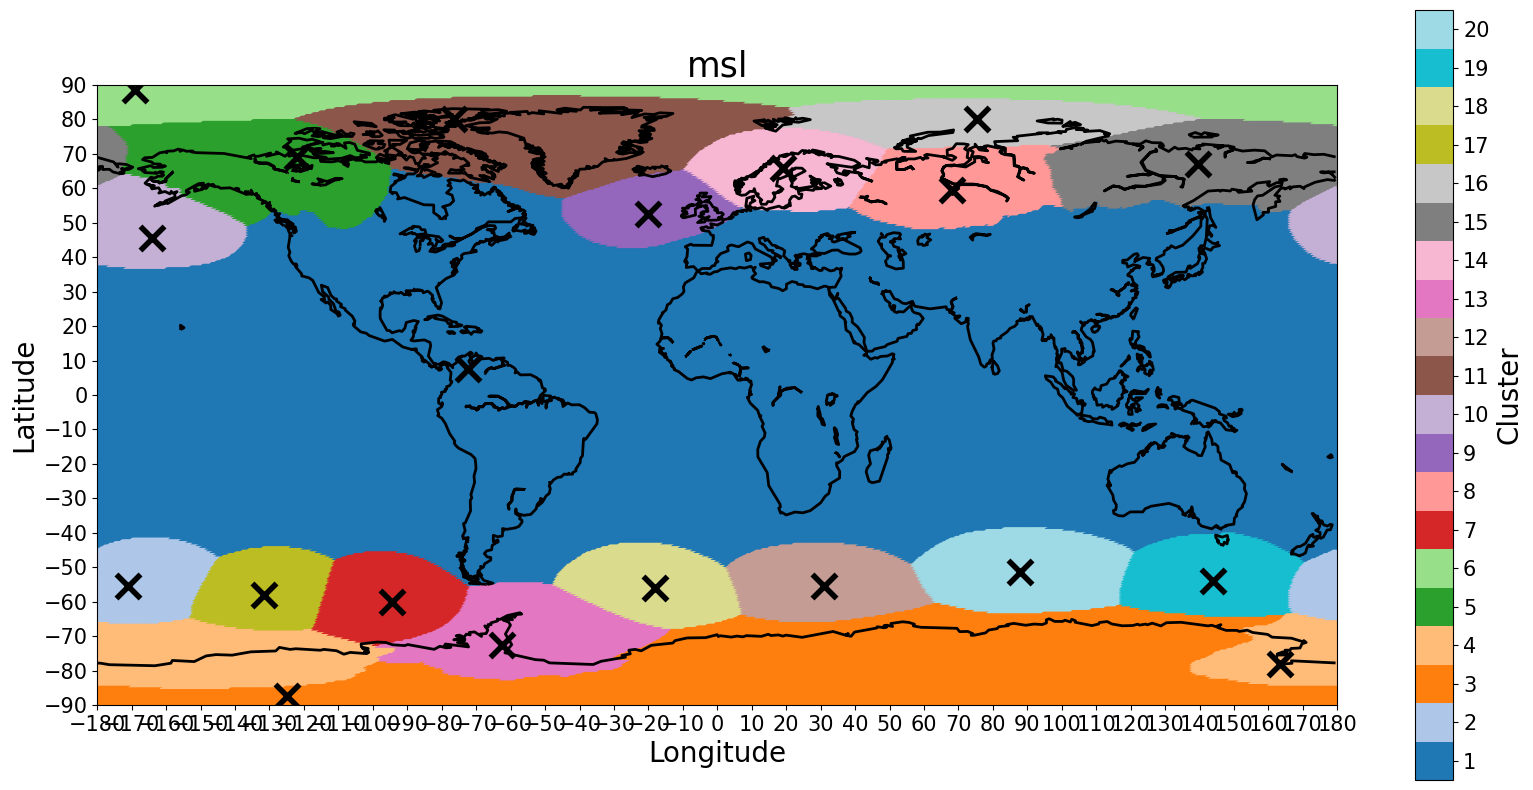

NameError: name 'pred_dataframe' is not defined

In [4]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

if cluster_output == 'centroids':
    pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
elif cluster_output == 'averages':
    pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


In [10]:
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')


In [4]:
if coord == 'World' or coord == 'all_but_atlantic':
        min_lat=-90
        max_lat=90
        min_lon=-180
        max_lon=180-resolution
elif coord == 'Europe':
    min_lat=30
    max_lat=70
    min_lon=-16
    max_lon=44
elif coord == 'North_Atlantic':
    min_lat=0
    max_lat=66
    min_lon=-90
    max_lon=40
elif coord == 'Artic':
    min_lat=48
    max_lat=90
    min_lon=-180
    max_lon=180-resolution

if coord == 'all_but_atlantic':
    all_but_atlantic = True
else:
    all_but_atlantic = False

# Data extraction
daily_data_train = xr.open_dataset(path+'data_daily_'+var+'_1950_2010.nc')

daily_data_test = xr.open_dataset(path+'data_daily_'+var+'_2011_2022.nc')



if var == 'sm1':    
    variable = 'swvl1'
elif var == 'sic':
    variable = 'siconc'
elif var == 'olr':
    variable = 'mtnlwrf'
elif var == 'z500':
    variable = 'z'
else:
    variable = var  
# Perform the cluster only on the train years
daily_data_train = daily_data_train.sel(time=slice(str(first_year)+'-01-01', str(int(last_year))+'-12-31'))
data_clima_time = daily_data_train.sel(time=slice(str(first_clima)+'-01-01', str(int(last_clima))+'-12-31'))

# Data preprocessing
from functions import filter_xarray

data_filtered = filter_xarray(daily_data_train, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)
data_filtered_clima = filter_xarray(data_clima_time, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)

if seasonal_soothing == True:

    year_average = data_filtered_clima.groupby('time.dayofyear').mean('time')
    year_average2 = np.append(np.append(year_average[variable].values, year_average[variable].values,axis=0), year_average[variable].values,axis=0)
    year_average_xarray = xr.DataArray(data=year_average2,dims=["dayofyear", "latitude", "longitude"],)
    year_average_smooth = year_average.rolling(dayofyear=30,min_periods=1, center=True).mean('time')
    year_average_smooth[variable] = year_average_xarray.rolling(dayofyear=30,min_periods=1, center=True).mean('time')[366:732,:,:]
    year_average_smooth_nonleap = year_average_smooth.sel(dayofyear=year_average_smooth['dayofyear']!=60)

    years = data_filtered.groupby('time.year').mean().year.values

    import calendar

    for year in years:
        is_leap_year = calendar.isleap(year)
        year_data = data_filtered.sel(time=data_filtered['time.year'] == year)

        if is_leap_year:
            diff = year_data[variable].values - year_average_smooth[variable].values
        else:
            diff = year_data[variable].values - year_average_smooth_nonleap[variable].values
        year_data[variable] = (('time', 'latitude', 'longitude'), diff)  
        data_filtered[variable].loc[dict(time=data_filtered['time.year'] == year)] = year_data[variable].values

        
data_filtered_clima.close()

# Reshape the data and change nan values
data = data_filtered[variable].values

data_res = data.reshape(data.shape[0], data.shape[1]*data.shape[2]).T

mask = ~np.any(np.isnan(data_res), axis=1)
# data_res = np.where(np.isnan(data_res), -100, data_res)

# mask = []
# for i in range(data_res.shape[0]):
#     if var == 'sm1':  
#         if np.all(data_res[i] < 0.0001):
#             mask.append(False)
#         else:
#             mask.append(True)
#     else:
#         # if np.all(data_res[i][0:100] == -100):
#         if np.all(np.isnan(data_res)[i][0:100]):
#             mask.append(False)
#         else:
#             mask.append(True)
# mask = np.array(mask)

if var == 't2m' or var == 'sm1':
    mask = np.load('mask_ocean_europe.npy')
else:
    mask = ~np.any(np.isnan(data_res), axis=1)
# np.save('mask_ocean_europe.npy', mask)


if all_but_atlantic==True:
    mask_2 = xr.where((data_filtered.longitude < -80) | (data_filtered.longitude > 20), True, False)
    mask_2 = mask_2.broadcast_like(data_filtered)

    mask_2 = np.moveaxis(mask_2.values, -1, 0)

    mask_2 = mask_2.reshape(data.shape[0], data.shape[1]*data.shape[2]).T

    mask_2 = mask_2[:,0]

    mask = mask & mask_2

if var=='sic':
    
    data_sic = filter_xarray(daily_data_train, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)[variable].values

    data_res_sic = data_sic.reshape(data_sic.shape[0], data_sic.shape[1]*data_sic.shape[2]).T

    mask_sic = data_res_sic.sum(axis=1)!=0

    mask = mask & mask_sic


data_res_masked = data_res[mask]

# Normalize each time series
if norm==True:
    from sklearn.preprocessing import normalize
    data_res_masked = normalize(data_res_masked, axis=1, copy=True, return_norm=False)


In [6]:
coord

'World'

In [5]:

# # Perform the clustering
# from clustering import cluster_model
# cluster = cluster_model(data_res_masked, numbe_of_clusters, var)
# cluster.check_data()
# cluster.kmeans()
# # cluster.agclustering()

# # Get the closest node to the cluster center

# centroids = cluster_model.get_closest2center2(cluster, data_res_masked)

# # Plot the clusters

north=data_filtered.indexes['latitude'][0] 
south=data_filtered.indexes['latitude'][-1]
west=data_filtered.indexes['longitude'][0]
east=data_filtered.indexes['longitude'][-1]

# cluster_model.plot_clusters2(cluster,data_res_masked,mask,north,south,west,east,coord,resolution)

# Get the data for the centroids 

lat = np.arange( north, south-resolution,-resolution)
lon = np.arange(west, east+resolution, resolution)

import itertools
iter = itertools.product(lat, lon)
nodes_list=list(iter)
nodes_list = np.array(nodes_list)[mask]

# lons_c = [np.array(nodes_list)[centroids][i][1] for i in range(len(np.array(nodes_list)[centroids]))]
# lats_c = [np.array(nodes_list)[centroids][i][0] for i in range(len(np.array(nodes_list)[centroids]))]

data_filtered_test = filter_xarray(daily_data_test, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)


if seasonal_soothing == True:

    years = data_filtered_test.groupby('time.year').mean().year.values

    import calendar

    for year in years:
        is_leap_year = calendar.isleap(year)
        year_data = data_filtered_test.sel(time=data_filtered_test['time.year'] == year)

        if is_leap_year:
            diff = year_data[variable].values - year_average_smooth[variable].values
        else:
            diff = year_data[variable].values - year_average_smooth_nonleap[variable].values

        year_data[variable] = (('time', 'latitude', 'longitude'), diff)  
        data_filtered_test[variable].loc[dict(time=data_filtered_test['time.year'] == year)] = year_data[variable].values


data_filtered_total = xr.concat([data_filtered, data_filtered_test], dim='time')
data_filtered.close()
data_filtered_test.close()
# centroids_data = []
# for i in range(len(centroids)):
#     centroid_data = data_filtered_total.sel(latitude=lats_c[i], longitude=lons_c[i])[variable].values
#     centroids_data.append(centroid_data)

# centroids_dataframe = pd.DataFrame(centroids_data).T
# centroids_dataframe.index = data_filtered_total.time.values
# centroids_dataframe.columns = [var+coord+'_cluster'+str(i) for i in range(1, numbe_of_clusters+1)]


# Get average data for each cluster

data_cl_av = data_filtered_total[variable].values


lat = np.arange( north, south-resolution,-resolution)
lon = np.arange(west, east+resolution, resolution)

import itertools
iter = itertools.product(lat, lon)
nodes_list=list(iter)

weights = np.cos(np.deg2rad(nodes_list[0][:,0]))

# data_filtered_total.close()

# for i in range(len(centroids)):
#     # cluster_data = data_cl_av_masked[cluster.labels==i]
#     cluster_mask = cluster.labels==i
#     if var == 'sst' or var=='sic' or var=='sm1':
#         data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask][cluster_mask]
#     else:
#         mask_cl = mask & cluster_mask
#         data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask_cl]
#     # cluster_average = data_cl_av_masked.mean(axis=0)
#     cluster_average = np.average(data_cl_av_masked, weights=weights[cluster_mask],axis=0)
#     clusters_av_dataframe[var+coord+'_cluster'+str(i+1)] = cluster_average

# clusters_av_dataframe.index = data_filtered_total.time.values

# labels_dataframe = pd.DataFrame(cluster.labels, columns=['cluster'])
# labels_dataframe['nodes_lat'] = nodes_list[:,0]
# labels_dataframe['nodes_lon'] = nodes_list[:,1]


TypeError: tuple indices must be integers or slices, not tuple

In [6]:
labe = pd.read_csv('../Predictors/Test9_medium/labels/labels11olrWorld10.csv', index_col=0)

In [7]:
def weighted_average(data, weights):
    weighted_sum = np.dot(weights, data)
    total_weight = np.sum(weights)
    return weighted_sum / total_weight

def calculate_weighted_average(data, weights, batch_size):
    num_rows = data.shape[0]
    result = np.zeros((data.shape[1],))
    
    for i in range(0, num_rows, batch_size):
        if i==190000:
            batch_size=878
        batch_data = data[i:i+batch_size]
        batch_weights = weights[i:i+batch_size]
        result += weighted_average(batch_data, batch_weights)
    
    return result / (num_rows / batch_size)

In [11]:
labe['cluster'].unique()

array([4, 7, 9, 3, 6, 0, 2, 5, 1, 8], dtype=int64)

In [17]:
weights[cluster_mask].shape

(190878,)

In [8]:
clusters_av_dataframe = pd.DataFrame(columns=[var+coord+'_cluster'+str(i) for i in range(1, numbe_of_clusters+1)])

weights = np.cos(np.deg2rad(np.array(nodes_list)[:,0]))

# data_filtered_total.close()

for i in range(len(labe['cluster'].unique())):
    # cluster_data = data_cl_av_masked[cluster.labels==i]
    cluster_mask = labe['cluster']==i
    if var == 'sst' or var=='sic' or var=='sm1':
        data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask][cluster_mask]
        batch_size = 1000  # Ajusta el tamaño del lote según tus necesidades
        cluster_average = calculate_weighted_average(data_cl_av_masked, weights[mask][cluster_mask], batch_size)
    else:
        mask_cl = mask & cluster_mask
        data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask_cl]
    # cluster_average = data_cl_av_masked.mean(axis=0)
        
        batch_size = 1000  # Ajusta el tamaño del lote según tus necesidades
        cluster_average = calculate_weighted_average(data_cl_av_masked, weights[cluster_mask], batch_size)    
    # cluster_average = np.average(data_cl_av_masked, weights=weights[cluster_mask],axis=0)
    clusters_av_dataframe[var+coord+'_cluster'+str(i+1)] = cluster_average

clusters_av_dataframe.index = data_filtered_total.time.values

labels_dataframe = pd.DataFrame(labe['cluster'], columns=['cluster'])
labels_dataframe['nodes_lat'] = np.array(nodes_list)[:,0]
labels_dataframe['nodes_lon'] = np.array(nodes_list)[:,1]


In [50]:
labels_dataframe

cluster
0             4
1             4
2             4
3             4
4             4
...         ...
171784        4
171785        4
171786        4
171787        4
171788        4

[171789 rows x 1 columns]

In [52]:
labels_dataframe['nodes_lat'] = np.array(nodes_list)[:,0][mask]
labels_dataframe['nodes_lon'] = np.array(nodes_list)[:,1][mask]


In [53]:
labels_dataframe

cluster  nodes_lat  nodes_lon
0             4       90.0     -180.0
1             4       90.0     -179.5
2             4       90.0     -179.0
3             4       90.0     -178.5
4             4       90.0     -178.0
...         ...        ...        ...
171784        4      -78.0      -38.0
171785        4      -78.0      -37.5
171786        4      -78.0      -37.0
171787        4      -78.0      -36.5
171788        4      -78.0      -36.0

[171789 rows x 3 columns]

In [34]:
weights[mask][cluster_mask]

array([0.19936793, 0.19936793, 0.19936793, ..., 0.40673664, 0.40673664,
       0.39874907])

In [23]:
num_rows

NameError: name 'num_rows' is not defined

In [21]:
data_cl_av_masked.shape

(190878, 26663)

In [25]:
batch_size = 1000  # Ajusta el tamaño del lote según tus necesidades
result = calculate_weighted_average(data_cl_av_masked, weights, batch_size)

In [31]:
data_cl_av_masked.mean(axis=0)

array([  -150.87996,   -159.2067 ,   -152.9076 , ..., -53313.95   ,
       -53313.598  , -53313.434  ], dtype=float32)

In [28]:
result

array([  -133.27816891,   -140.33719198,   -135.06366728, ...,
       -46848.24282993, -46847.89358314, -46847.68304789])

In [9]:
clusters_av_dataframe

olrWorld_cluster1  olrWorld_cluster2  olrWorld_cluster3  \
1950-01-01          12.391762          17.701639         -13.902543   
1950-01-02          10.558005          27.812405         -19.317067   
1950-01-03           6.776218          54.254553         -26.795496   
1950-01-04           2.221685          35.819122         -26.501709   
1950-01-05           4.503882          11.218009         -19.302871   
...                       ...                ...                ...   
2022-12-27          33.446126         -18.619722         -15.136105   
2022-12-28          30.470393         -20.048344          -3.597634   
2022-12-29          30.414295          10.509356           2.200972   
2022-12-30          29.392282          16.977227           3.706723   
2022-12-31          26.813900          13.562934          -3.472706   

            olrWorld_cluster4  olrWorld_cluster5  olrWorld_cluster6  \
1950-01-01         -20.674212         -26.243737          -6.194609   
1950-01-02          -4.704653         -27.032994          -4.135791   
1950-01-03           1.099902         -20.704719          -2.620085   
1950-01-04          14.379066         -20.106545          -3.777278   
1950-01-05          10.326710         -25.377268          -3.578775   
...                       ...                ...                ...   
2022-12-27         -11.809947         -11.364419           6.321056   
2022-12-28           3.355687          -9.986375           6.908579   
2022-12-29           7.202667         -12.549773           4.161913   
2022-12-30          -9.732540         -20.616033           3.415773   
2022-12-31         -18.817839         -23.369349           0.440801   

            olrWorld_cluster7  olrWorld_cluster8  olrWorld_cluster9  \
1950-01-01           4.804508         -35.321308          -1.513593   
1950-01-02          -6.772204         -37.075634          -0.956633   
1950-01-03           1.272563         -27.176227          -1.476625   
1950-01-04          -3.663890         -23.196477          -1.032009   
1950-01-05         -15.235679         -24.902486          -0.273062   
...                       ...                ...                ...   
2022-12-27          57.339526         -28.125921          -0.896839   
2022-12-28          31.385503         -33.524729          -1.267189   
2022-12-29          22.619432         -35.608740          -2.074019   
2022-12-30          19.007363         -39.410082          -1.946934   
2022-12-31          18.764605         -35.801656          -1.738409   

            olrWorld_cluster10  
1950-01-01           40.846642  
1950-01-02           17.670552  
1950-01-03           -0.145932  
1950-01-04           -1.804619  
1950-01-05            5.400367  
...                        ...  
2022-12-27           45.042684  
2022-12-28           58.612297  
2022-12-29           54.018872  
2022-12-30           29.731852  
2022-12-31           25.663821  

[26663 rows x 10 columns]

## 2- SM

In [3]:
#Variables
var = 'sm1'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'Europe'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 5

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =3


In [4]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
# centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
# clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
# labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))


AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
if coord == 'World' or coord == 'all_but_atlantic':
    min_lat=-90
    max_lat=90
    min_lon=-180
    max_lon=180-resolution
elif coord == 'Europe':
    min_lat=30
    max_lat=70
    min_lon=-16
    max_lon=44
elif coord == 'North_Atlantic':
    min_lat=0
    max_lat=66
    min_lon=-90
    max_lon=40
elif coord == 'Artic':
    min_lat=48
    max_lat=90
    min_lon=-180
    max_lon=180-resolution

if coord == 'all_but_atlantic':
    all_but_atlantic = True
else:
    all_but_atlantic = False

# Data extraction
daily_data_train = xr.open_dataset(path+'data_daily_'+var+'_1950_2010.nc')

daily_data_test = xr.open_dataset(path+'data_daily_'+var+'_2011_2022.nc')



if var == 'sm1':    
    variable = 'swvl1'
elif var == 'sic':
    variable = 'siconc'
elif var == 'olr':
    variable = 'mtnlwrf'
elif var == 'z500':
    variable = 'z'
else:
    variable = var  
# Perform the cluster only on the train years
daily_data_train = daily_data_train.sel(time=slice(str(first_year)+'-01-01', str(int(last_year))+'-12-31'))
data_clima_time = daily_data_train.sel(time=slice(str(first_clima)+'-01-01', str(int(last_clima))+'-12-31'))

# Data preprocessing
from functions import filter_xarray

data_filtered = filter_xarray(daily_data_train, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)
data_filtered_clima = filter_xarray(data_clima_time, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)

if seasonal_soothing == True:

    year_average = data_filtered_clima.groupby('time.dayofyear').mean('time')
    year_average2 = np.append(np.append(year_average[variable].values, year_average[variable].values,axis=0), year_average[variable].values,axis=0)
    year_average_xarray = xr.DataArray(data=year_average2,dims=["dayofyear", "latitude", "longitude"],)
    year_average_smooth = year_average.rolling(dayofyear=30,min_periods=1, center=True).mean('time')
    year_average_smooth[variable] = year_average_xarray.rolling(dayofyear=30,min_periods=1, center=True).mean('time')[366:732,:,:]
    year_average_smooth_nonleap = year_average_smooth.sel(dayofyear=year_average_smooth['dayofyear']!=60)

    years = data_filtered.groupby('time.year').mean().year.values

    import calendar

    for year in years:
        is_leap_year = calendar.isleap(year)
        year_data = data_filtered.sel(time=data_filtered['time.year'] == year)

        if is_leap_year:
            diff = year_data[variable].values - year_average_smooth[variable].values
        else:
            diff = year_data[variable].values - year_average_smooth_nonleap[variable].values
        year_data[variable] = (('time', 'latitude', 'longitude'), diff)  
        data_filtered[variable].loc[dict(time=data_filtered['time.year'] == year)] = year_data[variable].values

        
data_filtered_clima.close()

# Reshape the data and change nan values
data = data_filtered[variable].values

data_res = data.reshape(data.shape[0], data.shape[1]*data.shape[2]).T

mask = ~np.any(np.isnan(data_res), axis=1)
# data_res = np.where(np.isnan(data_res), -100, data_res)

# mask = []
# for i in range(data_res.shape[0]):
#     if var == 'sm1':  
#         if np.all(data_res[i] < 0.0001):
#             mask.append(False)
#         else:
#             mask.append(True)
#     else:
#         # if np.all(data_res[i][0:100] == -100):
#         if np.all(np.isnan(data_res)[i][0:100]):
#             mask.append(False)
#         else:
#             mask.append(True)
# mask = np.array(mask)

if var == 't2m' or var == 'sm1':
    mask = np.load('mask_ocean_europe.npy')
else:
    mask = ~np.any(np.isnan(data_res), axis=1)
# np.save('mask_ocean_europe.npy', mask)


if all_but_atlantic==True:
    mask_2 = xr.where((data_filtered.longitude < -80) | (data_filtered.longitude > 20), True, False)
    mask_2 = mask_2.broadcast_like(data_filtered)

    mask_2 = np.moveaxis(mask_2.values, -1, 0)

    mask_2 = mask_2.reshape(data.shape[0], data.shape[1]*data.shape[2]).T

    mask_2 = mask_2[:,0]

    mask = mask & mask_2

if var=='sic':
    
    data_sic = filter_xarray(daily_data_train, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)[variable].values

    data_res_sic = data_sic.reshape(data_sic.shape[0], data_sic.shape[1]*data_sic.shape[2]).T

    mask_sic = data_res_sic.sum(axis=1)!=0

    mask = mask & mask_sic


data_res_masked = data_res[mask]

# Normalize each time series
if norm==True:
    from sklearn.preprocessing import normalize
    data_res_masked = normalize(data_res_masked, axis=1, copy=True, return_norm=False)

# Perform the clustering
from clustering import cluster_model
cluster = cluster_model(data_res_masked, numbe_of_clusters, var)
cluster.check_data()
cluster.agclustering()


# # Get the closest node to the cluster center

# centroids = cluster_model.get_closest2center2(cluster, data_res_masked)

# # Plot the clusters

north=data_filtered.indexes['latitude'][0] 
south=data_filtered.indexes['latitude'][-1]
west=data_filtered.indexes['longitude'][0]
east=data_filtered.indexes['longitude'][-1]

cluster_model.plot_clusters2(cluster,data_res_masked,mask,north,south,west,east,coord,resolution)

# Get the data for the centroids 

lat = np.arange( north, south-resolution,-resolution)
lon = np.arange(west, east+resolution, resolution)

import itertools
iter = itertools.product(lat, lon)
nodes_list=list(iter)
nodes_list = np.array(nodes_list)[mask]

lons_c = [np.array(nodes_list)[centroids][i][1] for i in range(len(np.array(nodes_list)[centroids]))]
lats_c = [np.array(nodes_list)[centroids][i][0] for i in range(len(np.array(nodes_list)[centroids]))]

data_filtered_test = filter_xarray(daily_data_test, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)


if seasonal_soothing == True:

    years = data_filtered_test.groupby('time.year').mean().year.values

    import calendar

    for year in years:
        is_leap_year = calendar.isleap(year)
        year_data = data_filtered_test.sel(time=data_filtered_test['time.year'] == year)

        if is_leap_year:
            diff = year_data[variable].values - year_average_smooth[variable].values
        else:
            diff = year_data[variable].values - year_average_smooth_nonleap[variable].values

        year_data[variable] = (('time', 'latitude', 'longitude'), diff)  
        data_filtered_test[variable].loc[dict(time=data_filtered_test['time.year'] == year)] = year_data[variable].values


data_filtered_total = xr.concat([data_filtered, data_filtered_test], dim='time')
data_filtered.close()
data_filtered_test.close()
centroids_data = []
for i in range(len(centroids)):
    centroid_data = data_filtered_total.sel(latitude=lats_c[i], longitude=lons_c[i])[variable].values
    centroids_data.append(centroid_data)

centroids_dataframe = pd.DataFrame(centroids_data).T
centroids_dataframe.index = data_filtered_total.time.values
centroids_dataframe.columns = [var+coord+'_cluster'+str(i) for i in range(1, numbe_of_clusters+1)]


# Get average data for each cluster

data_cl_av = data_filtered_total[variable].values
# data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask]
# # np.savetxt('./Predictors/'+var+coord+str(numbe_of_clusters)+'.csv', data_cl_av_masked, delimiter=',')
# clusters_data = []
# for i in range(len(centroids)):
#     # cluster_data = data_cl_av_masked[cluster.labels==i]
#     clusters_data.append(data_cl_av_masked[cluster.labels==i].mean(axis=0))

# clusters_av_dataframe = pd.DataFrame(clusters_data).T
# clusters_av_dataframe.index = data_filtered_total.time.values
# clusters_av_dataframe.columns = [var+coord+'_cluster'+str(i) for i in range(1, numbe_of_clusters+1)]

clusters_av_dataframe = pd.DataFrame(columns=[var+coord+'_cluster'+str(i) for i in range(1, numbe_of_clusters+1)])

weights = np.cos(np.deg2rad(nodes_list[:,0]))

# data_filtered_total.close()

for i in range(len(centroids)):
    # cluster_data = data_cl_av_masked[cluster.labels==i]
    cluster_mask = cluster.labels==i
    if var == 'sst' or var=='sic':
        data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask][cluster_mask]
    else:
        # mask_cl = mask & cluster_mask
        data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask][cluster_mask]
    # cluster_average = data_cl_av_masked.mean(axis=0)
    cluster_average = np.average(data_cl_av_masked, weights=weights[cluster_mask],axis=0)
    clusters_av_dataframe[var+coord+'_cluster'+str(i+1)] = cluster_average

clusters_av_dataframe.index = data_filtered_total.time.values

labels_dataframe = pd.DataFrame(cluster.labels, columns=['cluster'])
labels_dataframe['nodes_lat'] = nodes_list[:,0]
labels_dataframe['nodes_lon'] = nodes_list[:,1]

KeyboardInterrupt: 

In [6]:
north=data_filtered.indexes['latitude'][0] 
south=data_filtered.indexes['latitude'][-1]
west=data_filtered.indexes['longitude'][0]
east=data_filtered.indexes['longitude'][-1]

AttributeError: 'NoneType' object has no attribute 'shape'

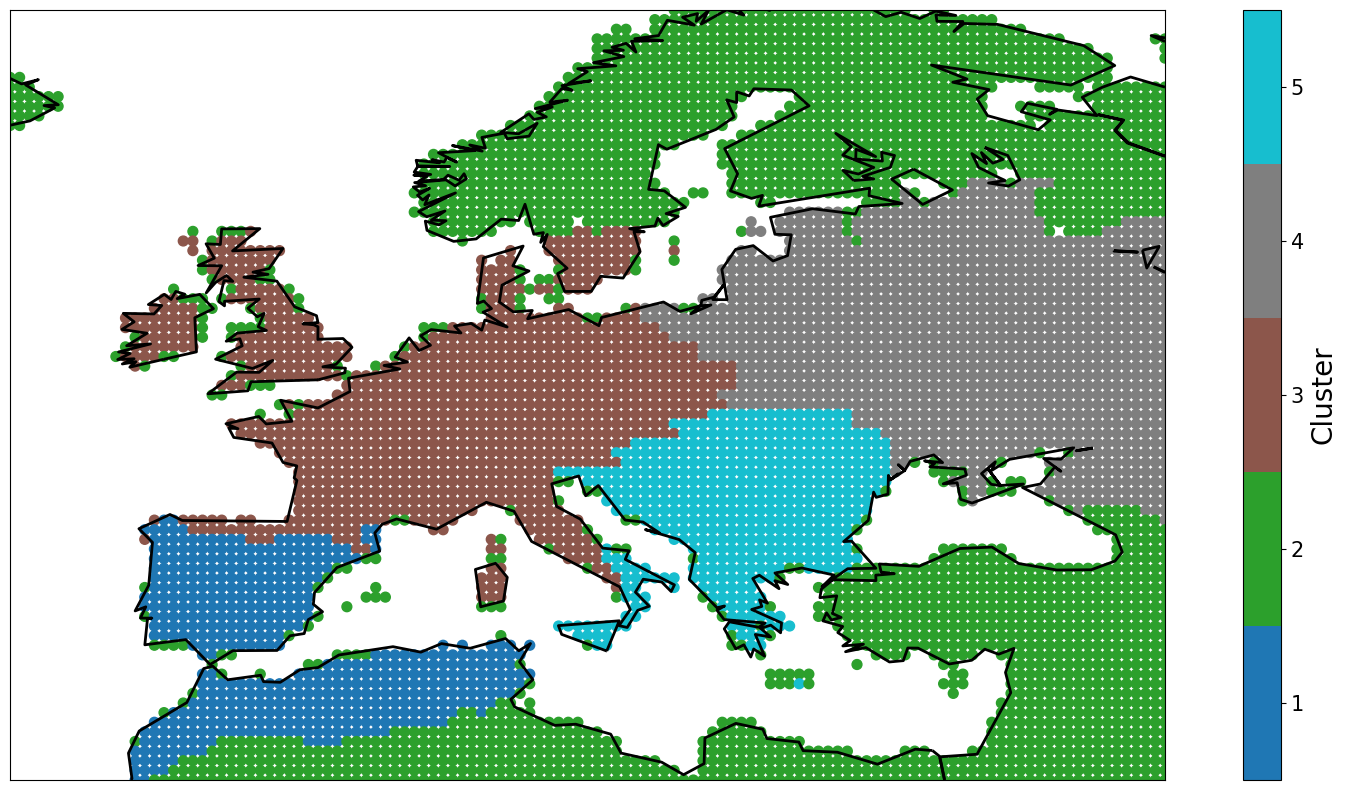

In [7]:
cluster_model.plot_clusters2(cluster,data_res_masked,mask,north,south,west,east,coord,resolution)

In [31]:
from sklearn.metrics import silhouette_samples

In [37]:
silhouette = silhouette_samples(data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask], cluster.labels)

In [47]:
silhouette[4203]

0.18373473

In [42]:
labels_dataframe[labels_dataframe['cluster']==1][labels_dataframe['nodes_lat']>40][labels_dataframe['nodes_lon']<4]

cluster  nodes_lat  nodes_lon
319         1       66.5      -16.0
320         1       66.5      -15.5
378         1       66.0      -16.0
379         1       66.0      -15.5
380         1       66.0      -15.0
...       ...        ...        ...
4074        1       42.0        2.5
4140        1       41.5        2.5
4141        1       41.5        3.0
4203        1       41.0        1.0
4204        1       41.0        1.5

[108 rows x 3 columns]

In [23]:
i=1
cluster_mask = cluster.labels==i
if var == 'sst' or var=='sic':
    data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask][cluster_mask]
else:
    # mask_cl = mask & cluster_mask
    data_cl_av_masked = data_cl_av.reshape(data_cl_av.shape[0], data_cl_av.shape[1]*data_cl_av.shape[2]).T[mask][cluster_mask]
# cluster_average = data_cl_av_masked.mean(axis=0)
cluster_average = np.average(data_cl_av_masked, weights=weights[cluster_mask],axis=0)
clusters_av_dataframe[var+coord+'_cluster'+str(i+1)] = cluster_average

In [38]:
cluster_average

array([ 0.02028737,  0.02198726,  0.02021442, ..., -0.0027647 ,
       -0.00403885, -0.00483474])

## 3- SIC

In [11]:
#Variables
var = 'sic'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'Artic'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 10

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =4

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [0, 18176, 12870, 16684, 15784, 16028, 27179, 19576, 21307, 29499]
Index of the closest cluster center for each sample [0, 18176, 12870, 16684, 15784, 16028, 27179, 19576, 21307, 29499]


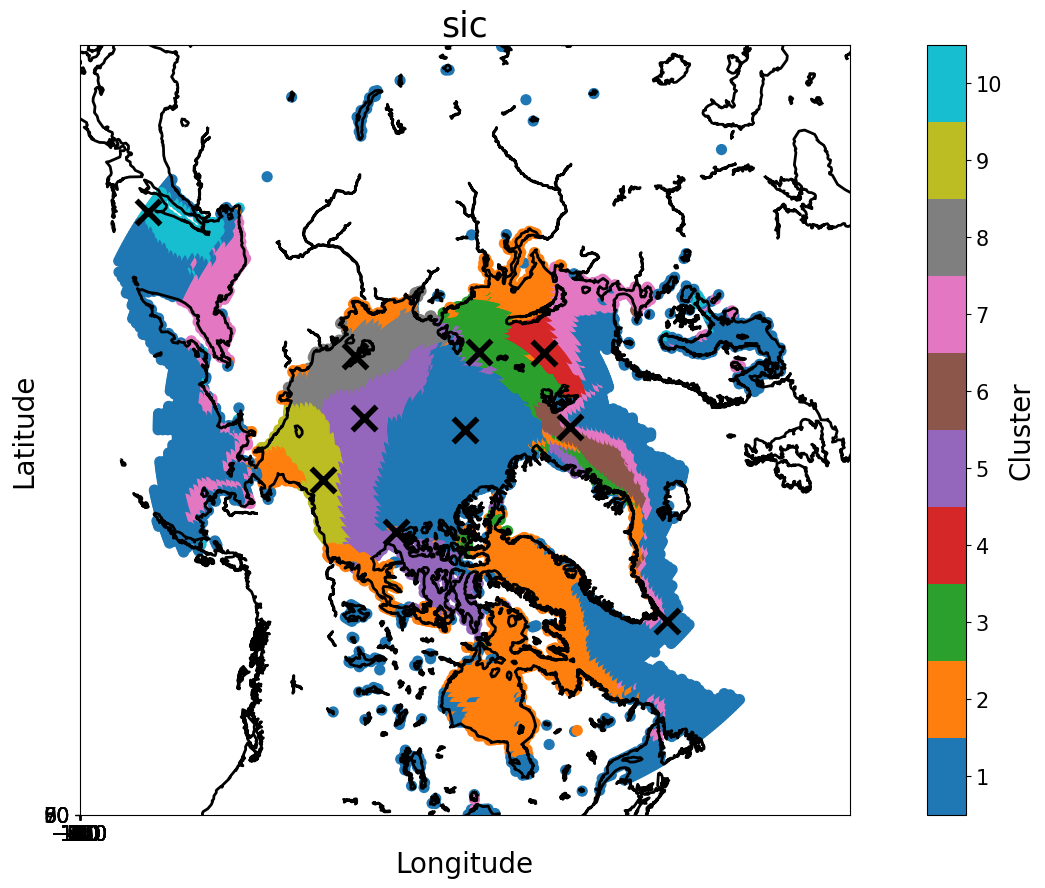

NameError: name 'pred_dataframe' is not defined

In [12]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
if cluster_output == 'centroids':
    pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
elif cluster_output == 'averages':
    pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


## 4- SST

In [5]:
#Variables
var = 'sst'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'World'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 20

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =5

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [74693, 83795, 170745, 148160, 80409, 84572, 150138, 66631, 18209, 82686, 27310, 81859, 139260, 37390, 36823, 95898, 85541, 39166, 114600, 19347]
Index of the closest cluster center for each sample [74693, 83795, 170745, 148160, 80409, 84572, 150138, 66631, 18209, 82686, 27310, 81859, 139260, 37390, 36823, 95898, 85541, 39166, 114600, 19347]


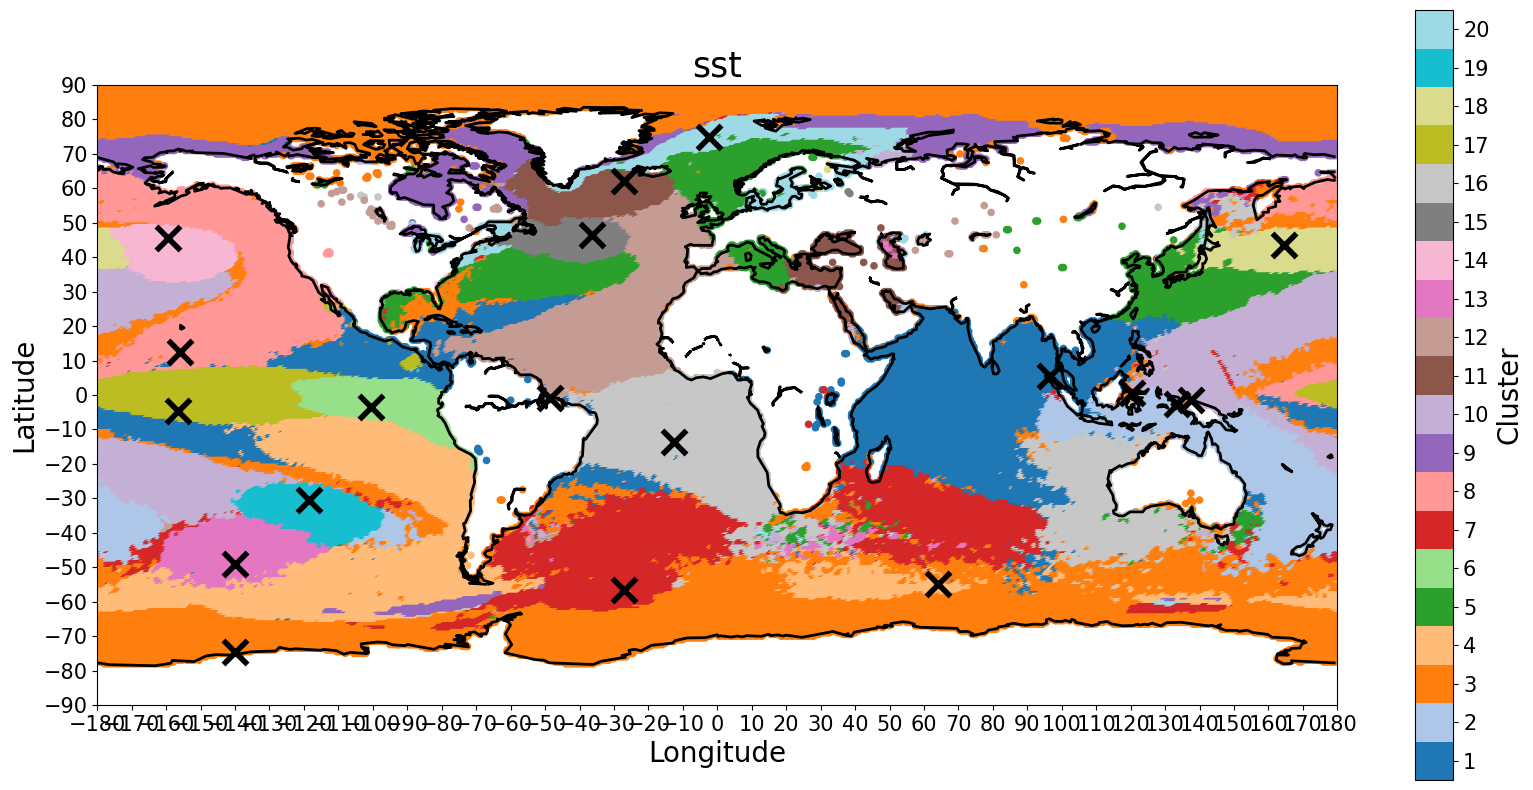

IndexError: boolean index did not match indexed array along dimension 0; dimension is 171789 but corresponding boolean dimension is 259920

In [6]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


In [4]:
if coord == 'World' or coord == 'all_but_atlantic':
    min_lat=-90
    max_lat=90
    min_lon=-180
    max_lon=180-resolution
elif coord == 'Europe':
    min_lat=30
    max_lat=70
    min_lon=-16
    max_lon=44
elif coord == 'North_Atlantic':
    min_lat=0
    max_lat=66
    min_lon=-90
    max_lon=40
elif coord == 'Artic':
    min_lat=48
    max_lat=90
    min_lon=-180
    max_lon=180-resolution

if coord == 'all_but_atlantic':
    all_but_atlantic = True
else:
    all_but_atlantic = False

# Data extraction
daily_data_train = xr.open_dataset(path+'data_daily_'+var+'_1950_2010.nc')

daily_data_test = xr.open_dataset(path+'data_daily_'+var+'_2011_2022.nc')



if var == 'sm1':    
    variable = 'swvl1'
elif var == 'sic':
    variable = 'siconc'
elif var == 'olr':
    variable = 'mtnlwrf'
elif var == 'z500':
    variable = 'z'
else:
    variable = var  
# Perform the cluster only on the train years
daily_data_train = daily_data_train.sel(time=slice(str(first_year)+'-01-01', str(int(last_year))+'-12-31'))
data_clima_time = daily_data_train.sel(time=slice(str(first_clima)+'-01-01', str(int(last_clima))+'-12-31'))

# Data preprocessing
from functions import filter_xarray

data_filtered = filter_xarray(daily_data_train, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)
data_filtered_clima = filter_xarray(data_clima_time, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)

if seasonal_soothing == True:

    year_average = data_filtered_clima.groupby('time.dayofyear').mean('time')
    year_average2 = np.append(np.append(year_average[variable].values, year_average[variable].values,axis=0), year_average[variable].values,axis=0)
    year_average_xarray = xr.DataArray(data=year_average2,dims=["dayofyear", "latitude", "longitude"],)
    year_average_smooth = year_average.rolling(dayofyear=30,min_periods=1, center=True).mean('time')
    year_average_smooth[variable] = year_average_xarray.rolling(dayofyear=30,min_periods=1, center=True).mean('time')[366:732,:,:]
    year_average_smooth_nonleap = year_average_smooth.sel(dayofyear=year_average_smooth['dayofyear']!=60)

    years = data_filtered.groupby('time.year').mean().year.values

    import calendar

    for year in years:
        is_leap_year = calendar.isleap(year)
        year_data = data_filtered.sel(time=data_filtered['time.year'] == year)

        if is_leap_year:
            diff = year_data[variable].values - year_average_smooth[variable].values
        else:
            diff = year_data[variable].values - year_average_smooth_nonleap[variable].values
        year_data[variable] = (('time', 'latitude', 'longitude'), diff)  
        data_filtered[variable].loc[dict(time=data_filtered['time.year'] == year)] = year_data[variable].values

        
data_filtered_clima.close()

# Reshape the data and change nan values
data = data_filtered[variable].values

data_res = data.reshape(data.shape[0], data.shape[1]*data.shape[2]).T

mask = ~np.any(np.isnan(data_res), axis=1)
# data_res = np.where(np.isnan(data_res), -100, data_res)

# mask = []
# for i in range(data_res.shape[0]):
#     if var == 'sm1':  
#         if np.all(data_res[i] < 0.0001):
#             mask.append(False)
#         else:
#             mask.append(True)
#     else:
#         # if np.all(data_res[i][0:100] == -100):
#         if np.all(np.isnan(data_res)[i][0:100]):
#             mask.append(False)
#         else:
#             mask.append(True)
# mask = np.array(mask)

if var == 't2m' or var == 'sm1':
    mask = np.load('mask_ocean_europe.npy')
else:
    mask = ~np.any(np.isnan(data_res), axis=1)
# np.save('mask_ocean_europe.npy', mask)


if all_but_atlantic==True:
    mask_2 = xr.where((data_filtered.longitude < -80) | (data_filtered.longitude > 20), True, False)
    mask_2 = mask_2.broadcast_like(data_filtered)

    mask_2 = np.moveaxis(mask_2.values, -1, 0)

    mask_2 = mask_2.reshape(data.shape[0], data.shape[1]*data.shape[2]).T

    mask_2 = mask_2[:,0]

    mask = mask & mask_2

if var=='sic':
    
    data_sic = filter_xarray(daily_data_train, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon, months=months,resolution=resolution)[variable].values

    data_res_sic = data_sic.reshape(data_sic.shape[0], data_sic.shape[1]*data_sic.shape[2]).T

    mask_sic = data_res_sic.sum(axis=1)!=0

    mask = mask & mask_sic


data_res_masked = data_res[mask]

# Normalize each time series
if norm==True:
    from sklearn.preprocessing import normalize
    data_res_masked = normalize(data_res_masked, axis=1, copy=True, return_norm=False)

# Perform the clustering
from clustering import cluster_model
cluster = cluster_model(data_res_masked, numbe_of_clusters, var)
cluster.check_data()
cluster.agclustering()


# # Get the closest node to the cluster center

# centroids = cluster_model.get_closest2center2(cluster, data_res_masked)

# # Plot the clusters

north=data_filtered.indexes['latitude'][0] 
south=data_filtered.indexes['latitude'][-1]
west=data_filtered.indexes['longitude'][0]
east=data_filtered.indexes['longitude'][-1]

cluster_model.plot_clusters2(cluster,data_res_masked,mask,north,south,west,east,coord,resolution)

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))


MemoryError: Unable to allocate 110. GiB for an array with shape (14755644366,) and data type float64

In [9]:
#Variables
var = 'sst'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'North_Atlantic'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 10

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =6

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [6136, 15608, 1270, 14020, 2965, 2866, 5457, 9776, 7186, 6533]
Index of the closest cluster center for each sample [6136, 15608, 1270, 14020, 2965, 2866, 5457, 9776, 7186, 6533]


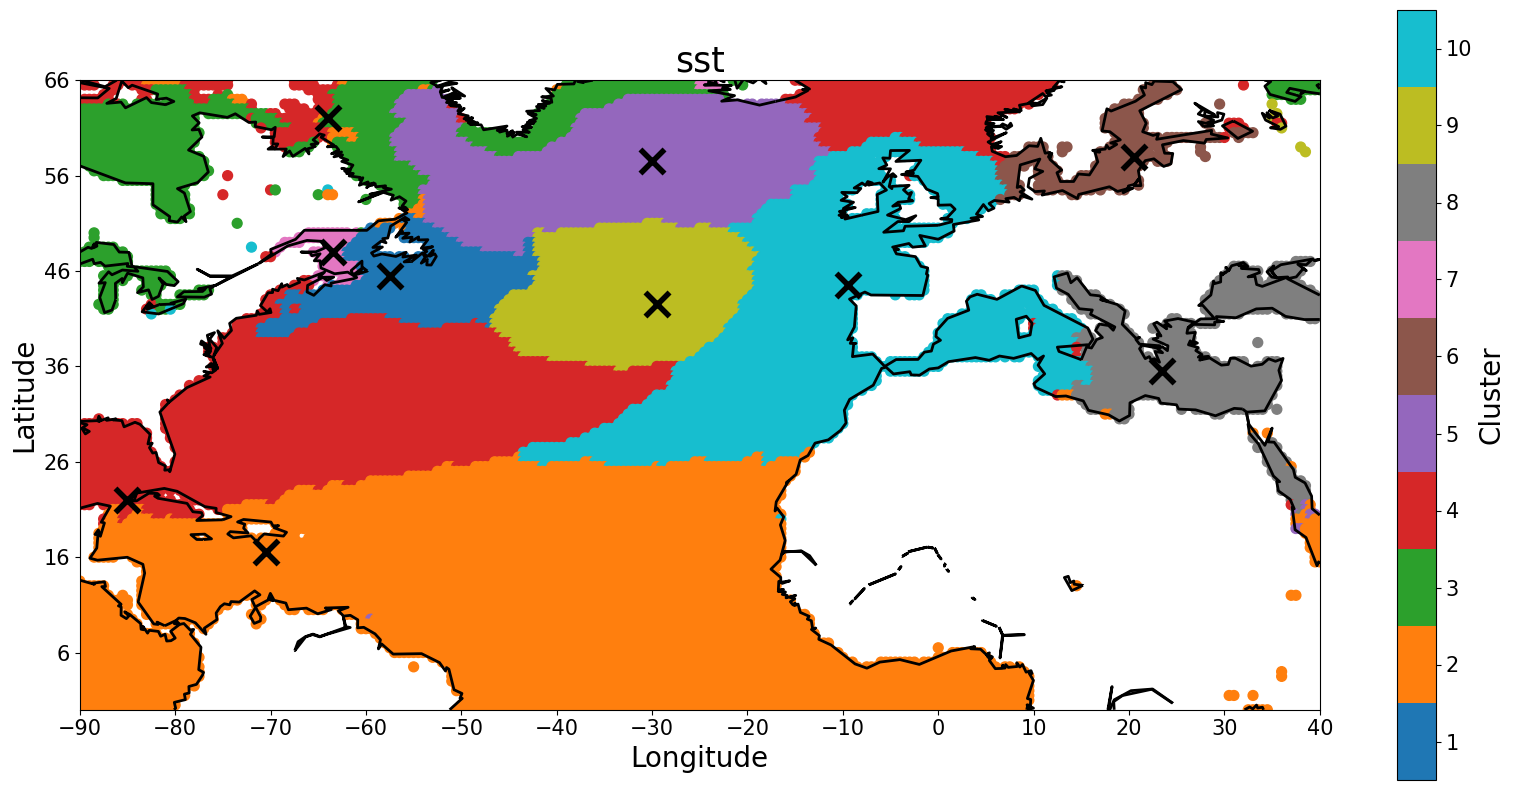

In [10]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


## 5- Z500 

In [11]:
#Variables
var = 'z500'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'Europe'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 10

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =7

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [5340, 7603, 1513, 1311, 3044, 7444, 8009, 867, 4290, 4092]
Index of the closest cluster center for each sample [5340, 7603, 1513, 1311, 3044, 7444, 8009, 867, 4290, 4092]


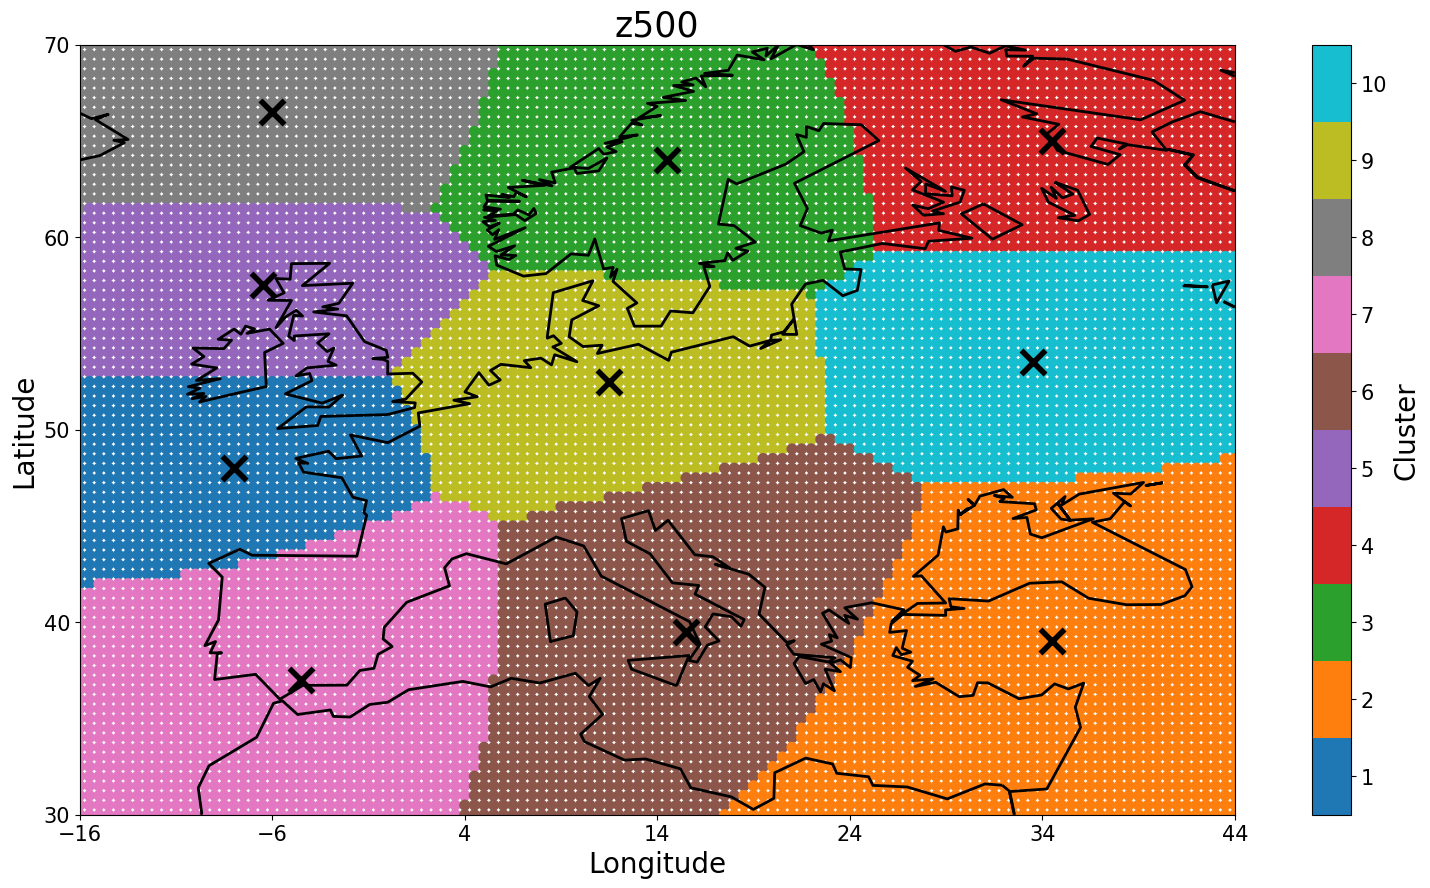

In [12]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


In [3]:
#Variables
var = 'z500'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'World'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 20

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =8

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [212395, 212714, 39051, 127648, 241258, 243906, 214713, 230633, 20423, 35662, 56177, 30872, 38642, 28870, 258730, 208552, 207202, 1454, 214634, 13427]
Index of the closest cluster center for each sample [212395, 212714, 39051, 127648, 241258, 243906, 214713, 230633, 20423, 35662, 56177, 30872, 38642, 28870, 258730, 208552, 207202, 1454, 214634, 13427]


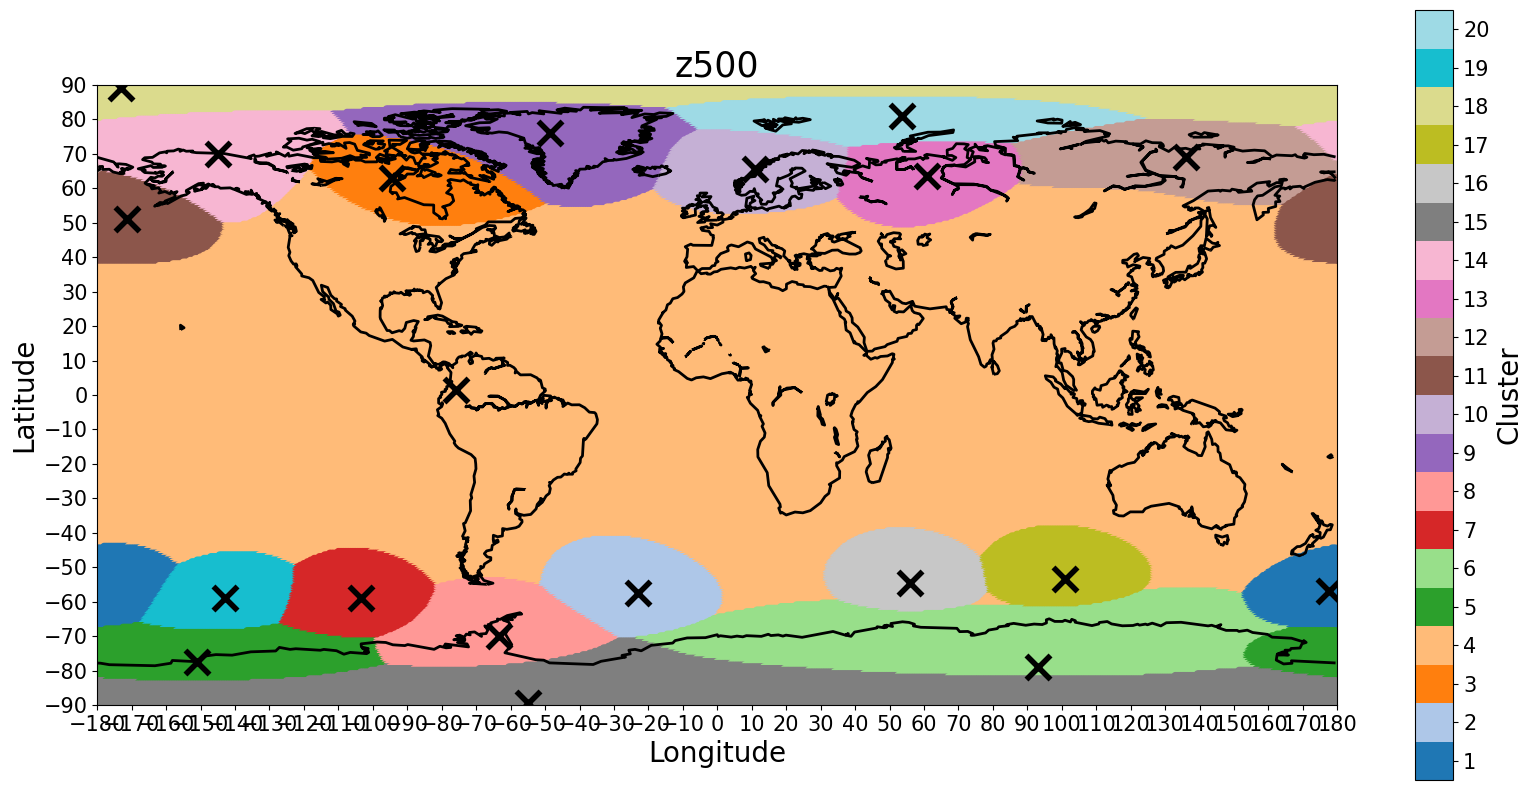

In [4]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


## 6- Precipitation 

In [15]:
#Variables
var = 'tp'  # msl, sic, sm1, sst,t2m,tp

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'Europe'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 10

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =9

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [8903, 9767, 8604, 5635, 2197, 649, 5341, 3682, 7725, 6325]
Index of the closest cluster center for each sample [8903, 9767, 8604, 5635, 2197, 649, 5341, 3682, 7725, 6325]


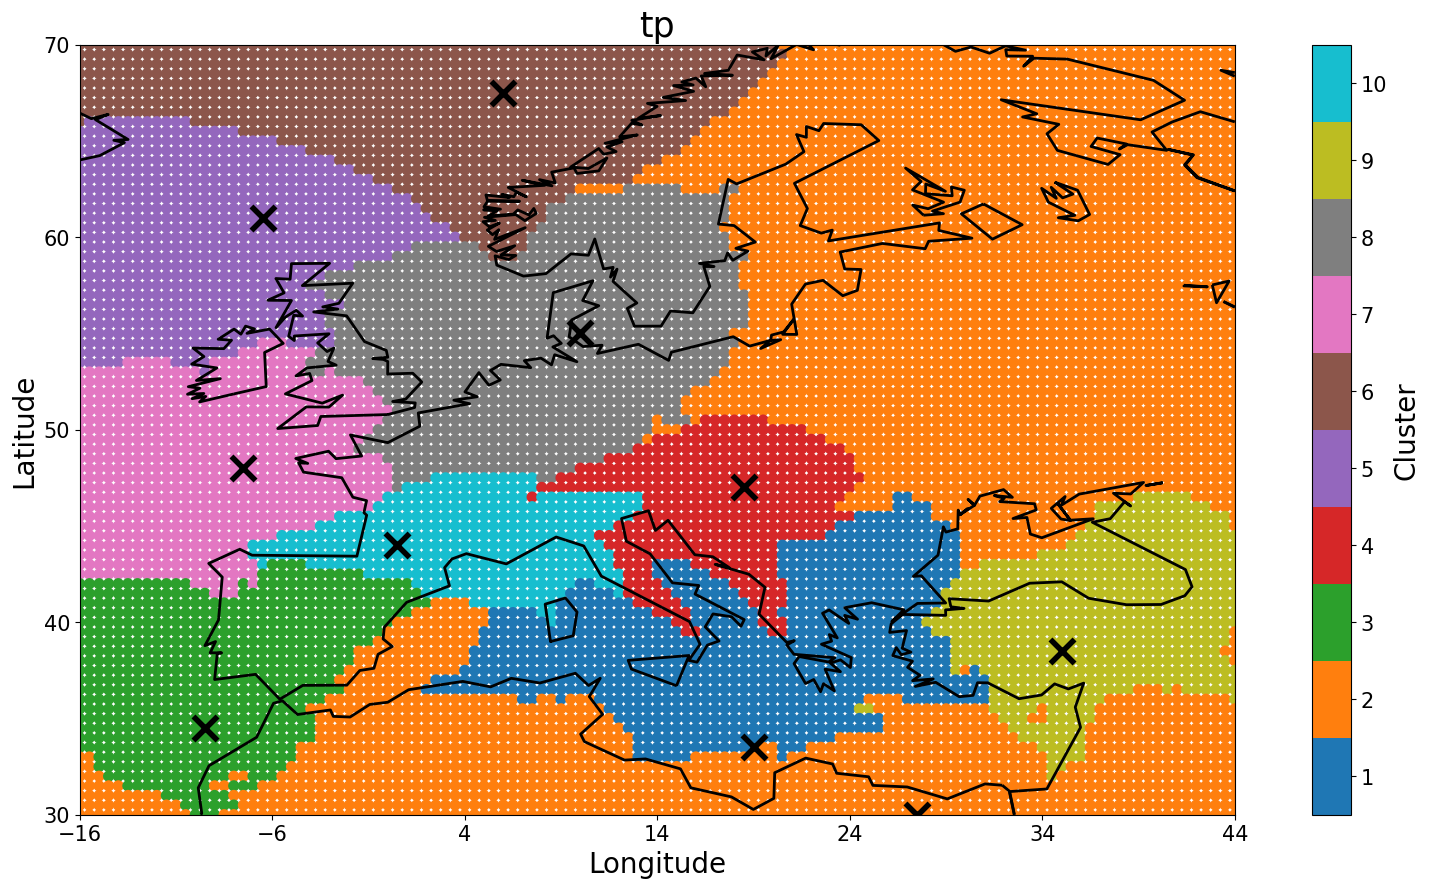

In [16]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


## 7- OLR 

In [17]:
#Variables
var = 'olr'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'North_Atlantic'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 10

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =10

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [18076, 1136, 18766, 34199, 30595, 24212, 2546, 24649, 27895, 19854]
Index of the closest cluster center for each sample [18076, 1136, 18766, 34199, 30595, 24212, 2546, 24649, 27895, 19854]


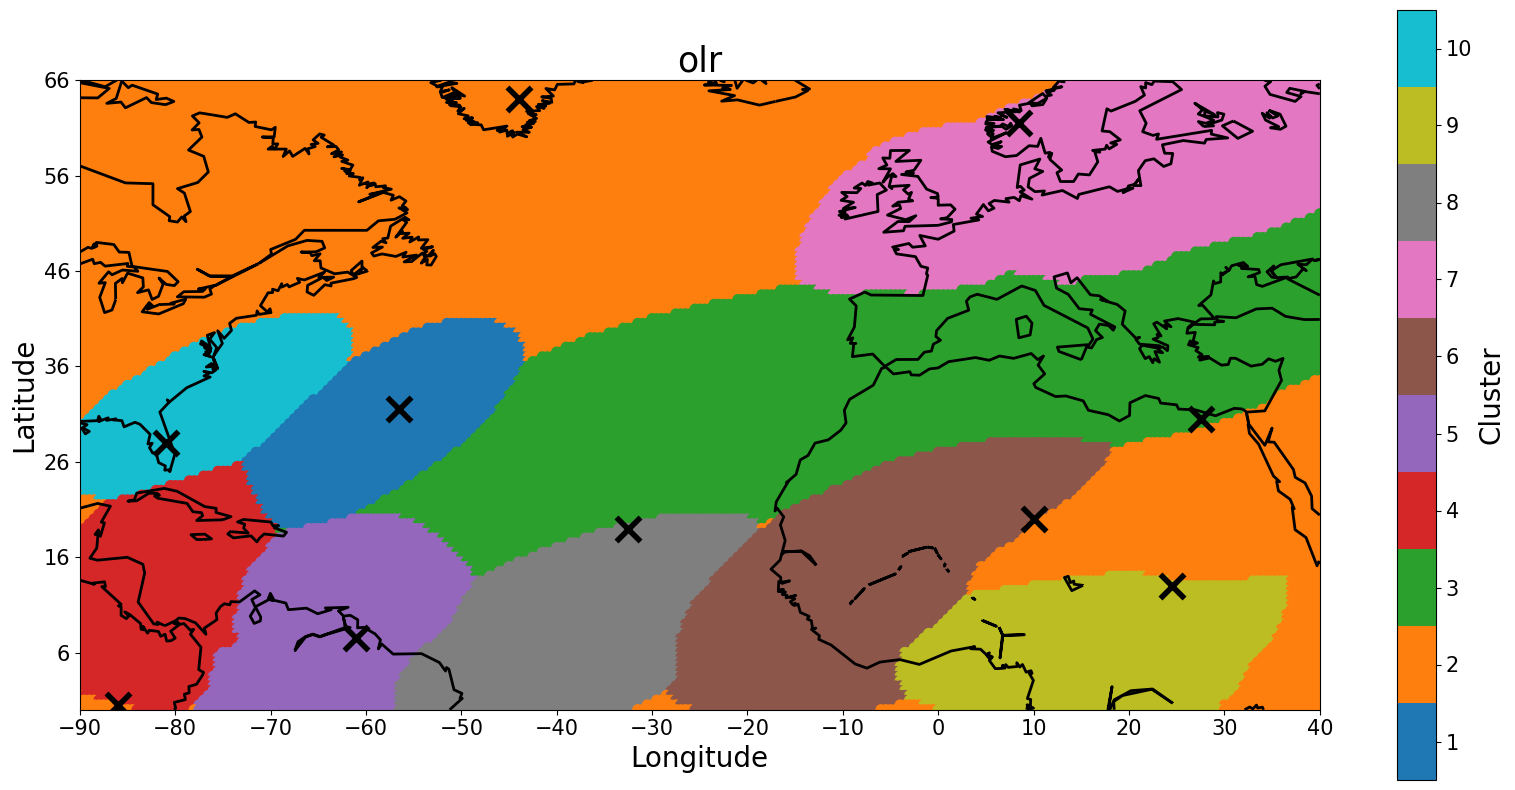

In [18]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


In [5]:
#Variables
var = 'olr'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'World'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 20

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =11

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [159802, 31102, 130672, 22195, 130785, 133763, 11808, 147225, 111393, 135995, 159888, 152864, 130364, 161909, 138168, 113710, 157983, 112175, 159848, 246146]
Index of the closest cluster center for each sample [159802, 31102, 130672, 22195, 130785, 133763, 11808, 147225, 111393, 135995, 159888, 152864, 130364, 161909, 138168, 113710, 157983, 112175, 159848, 246146]


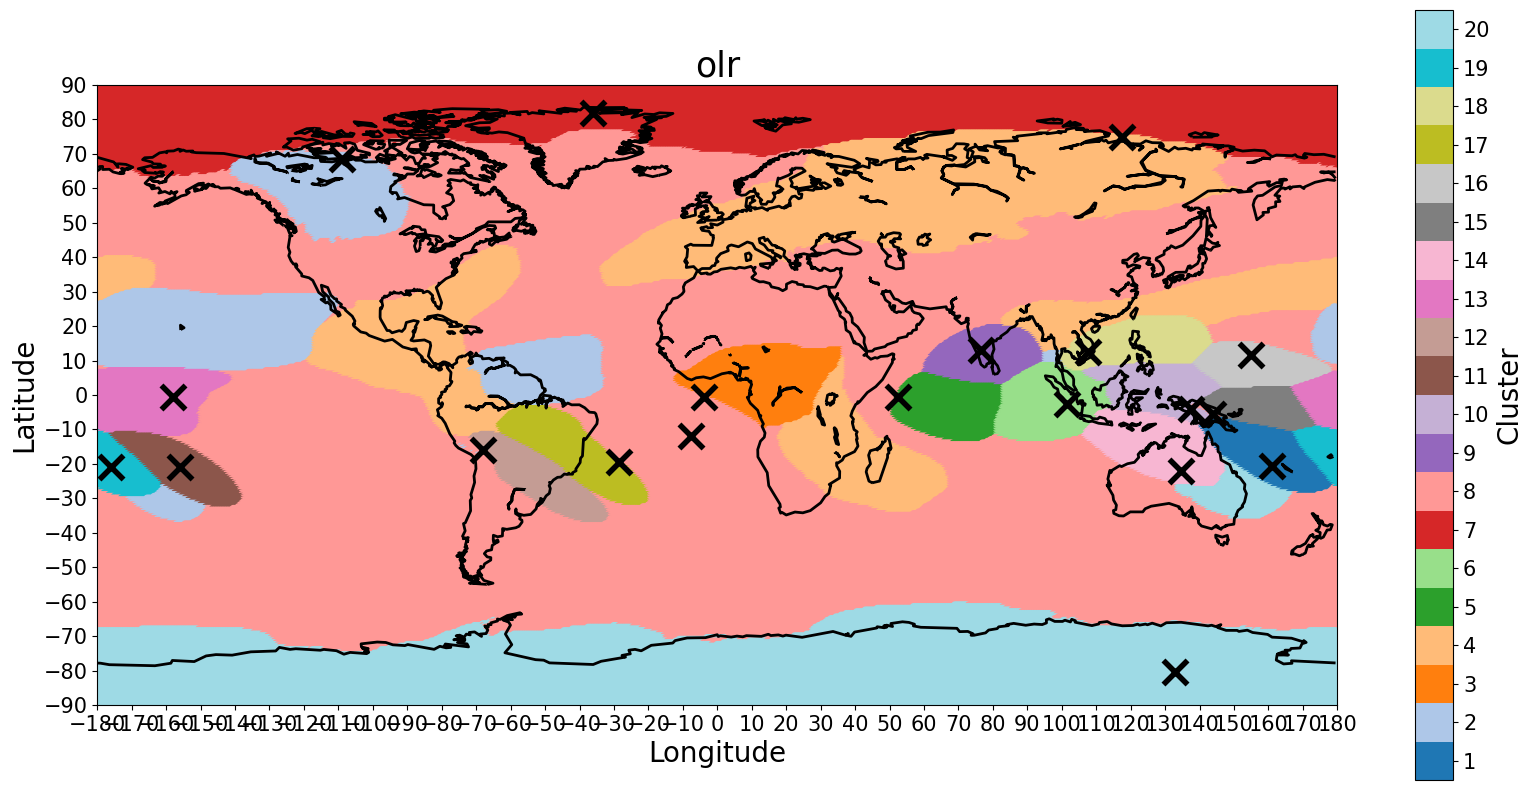

In [6]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


## 8- T2M

In [21]:
#Variables
var = 't2m'  # msl, sic, sm1, sst,t2m

# Filterig

months =[1,2,3,4,5,6,7,8,9,10,11,12] #[1,2,3,4,5,11,12], [1,2,3,4,5,6,7,8,9,10,11,12]

coord = 'Europe'               #World, Europe, North_Atlantic, Artic ,all_but_atlantic


# Number of clusters

numbe_of_clusters = 10

# Normalize each time series
norm = False
seasonal_soothing = True

var_num =12

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))
Index of the closest cluster center for each sample [1863, 3531, 414, 5340, 1162, 4782, 2577, 3866, 2727, 1058]
Index of the closest cluster center for each sample [1863, 3531, 414, 5340, 1162, 4782, 2577, 3866, 2727, 1058]


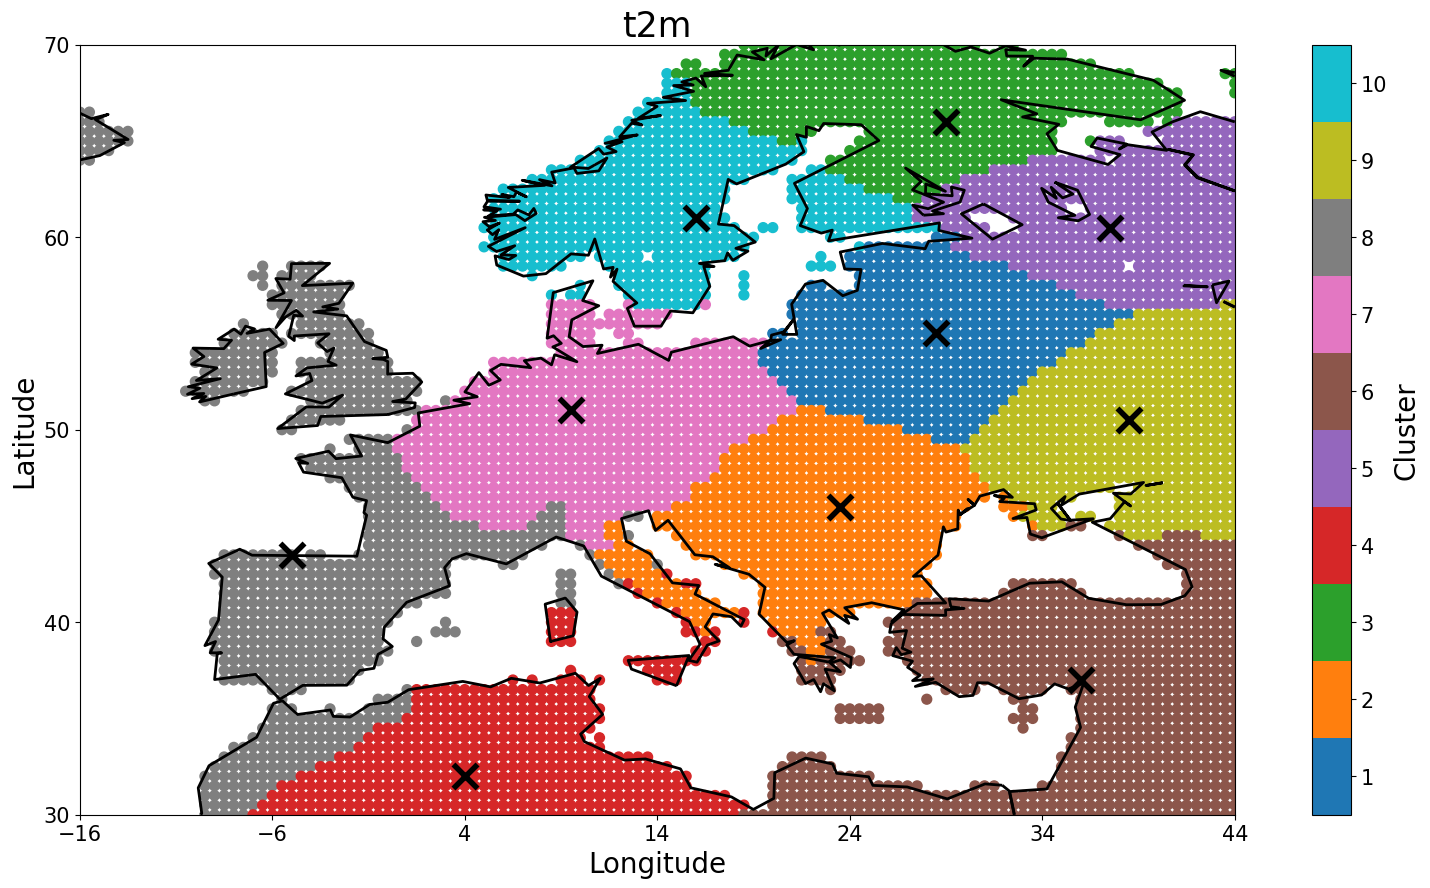

ValueError: operands could not be broadcast together with shapes (9801,) (5803,) 

In [22]:
centroids, centroids_dataframe, clusters_av_dataframe,labels = perform_clustering(var, months, coord, numbe_of_clusters, norm, seasonal_soothing, first_year,last_year, first_clima, last_clima,resolution, path)
centroids_dataframe.to_csv('../Predictors/'+folder+'/centroids'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
clusters_av_dataframe.to_csv('../Predictors/'+folder+'/averages'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')
labels.to_csv('../Predictors/'+folder+'/labels'+str(var_num)+var+coord+str(numbe_of_clusters)+'.csv')

# if cluster_output == 'centroids':
#     pred_dataframe = pd.concat([pred_dataframe, centroids_dataframe], axis=1)
# elif cluster_output == 'averages':
#     pred_dataframe = pd.concat([pred_dataframe, clusters_av_dataframe], axis=1)


## Merge data

In [44]:
locals = pd.DataFrame(index=pred_dataframe.index)
for var in ['msl','olr','sm1','t2m','tp','z500']:
    if var == 'sm1':    
        variable = 'swvl1'
    elif var == 'sic':
        variable = 'siconc'
    elif var == 'olr':
        variable = 'mtnlwrf'
    elif var == 'z500':
        variable = 'z'
    else:
        variable = var
    daily_data_train = xr.open_dataset(path+'data_daily_'+var+'_1950_2010.nc')

    daily_data_test = xr.open_dataset(path+'data_daily_'+var+'_2011_2022.nc')

    data_train_como = daily_data_train.sel(latitude=45.93, longitude=9.22, method='nearest')
    data_test_como = daily_data_test.sel(latitude=45.93, longitude=9.22, method='nearest')

    year_average = data_train_como.groupby('time.dayofyear').mean('time')
    year_average2 = np.append(np.append(year_average[variable].values, year_average[variable].values,axis=0), year_average[variable].values,axis=0)
    year_average_xarray = xr.DataArray(data=year_average2,dims=["dayofyear"],)
    year_average_smooth = year_average.rolling(dayofyear=30,min_periods=1, center=True).mean('time')
    year_average_smooth[variable] = year_average_xarray.rolling(dayofyear=30,min_periods=1, center=True).mean('time')[366:732]
    year_average_smooth_nonleap = year_average_smooth.sel(dayofyear=year_average_smooth['dayofyear']!=60)

    years = data_train_como.groupby('time.year').mean().year.values

    import calendar

    for year in years:
        is_leap_year = calendar.isleap(year)
        year_data = data_train_como.sel(time=data_train_como['time.year'] == year)

        if is_leap_year:
            diff = year_data[variable].values - year_average_smooth[variable].values
        else:
            diff = year_data[variable].values - year_average_smooth_nonleap[variable].values
        year_data[variable] = (('time'), diff)  
        data_train_como[variable].loc[dict(time=data_train_como['time.year'] == year)] = year_data[variable].values
    
    years = data_test_como.groupby('time.year').mean().year.values

    import calendar

    for year in years:
        is_leap_year = calendar.isleap(year)
        year_data = data_test_como.sel(time=data_test_como['time.year'] == year)

        if is_leap_year:
            diff = year_data[variable].values - year_average_smooth[variable].values
        else:
            diff = year_data[variable].values - year_average_smooth_nonleap[variable].values
        year_data[variable] = (('time'), diff)  
        data_test_como[variable].loc[dict(time=data_test_como['time.year'] == year)] = year_data[variable].values

    locals[var] = np.concatenate([data_train_como[variable].values, data_test_como[variable].values])

NameError: name 'pred_dataframe' is not defined

In [82]:
locals

msl         olr       sm1         t2m        tp  \
1950-01-01    1074.304688  -19.799576 -0.001452   -0.546417 -0.000082   
1950-01-02     642.835938  -12.598785 -0.003311   -1.187195 -0.000108   
1950-01-03    -944.546875    8.103180  0.002631    2.129913  0.000021   
1950-01-04   -1191.218750   12.288986  0.010736    1.757019  0.000078   
1950-01-05    -884.921875  -22.242813  0.014972    3.022552 -0.000076   
...                   ...         ...       ...         ...       ...   
2022-12-27  102564.468750 -232.575607  0.339433  278.923676  0.000002   
2022-12-28  102648.601562 -219.282104  0.337704  277.288086  0.000005   
2022-12-29  102272.257812 -210.122086  0.337867  278.288666  0.000056   
2022-12-30  102246.273438 -218.326477  0.348900  278.974487  0.000043   
2022-12-31  102940.695312 -226.699203  0.343138  278.697723  0.000003   

                   z500  
1950-01-01   944.785156  
1950-01-02  1106.644531  
1950-01-03  -245.832031  
1950-01-04  -888.054688  
1950-01-05   -98.957031  
...                 ...  
2022-12-27  7127.306641  
2022-12-28  7127.306641  
2022-12-29  7127.306641  
2022-12-30  7127.306641  
2022-12-31  7127.306641  

[26663 rows x 6 columns]

In [59]:
locals.to_csv('../Predictors/'+folder+'/locals_variables.csv')

In [47]:
data_cO2= xr.open_dataset(path+'ghg_ssp585_1940-2022_cmip6_c191015.nc')

In [48]:
data_cO2.sel(time=slice(str(first_year)+'-01-01', str(int(2022))+'-12-31')).CO2.values

array([312.72668, 312.7272 , 312.72772, ..., 423.0116 , 423.02087,
       423.03012], dtype=float32)

In [49]:
data_cO2.sel(time=slice(str(first_year)+'-01-01', str(int(last_year))+'-12-31')).CO2.time

<xarray.DataArray 'time' (time: 22280)>
array(['1950-01-01T00:00:00.000000000', '1950-01-02T00:00:00.000000000',
       '1950-01-03T00:00:00.000000000', ..., '2010-12-29T00:00:00.000000000',
       '2010-12-30T00:00:00.000000000', '2010-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2010-12-31
Attributes:
    long_name:  time
    axis:       T

In [ ]:
pred_dataframe.index

Index(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04', '1950-01-05',
       '1950-01-06', '1950-01-07', '1950-01-08', '1950-01-09', '1950-01-10',
       ...
       '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
       '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
      dtype='object', length=26663)

In [61]:
import glob

pred_dataframe = pd.read_csv(glob.glob('../Predictors/'+folder+'/averages'+str(1).zfill(2)+'*.csv')[0], index_col=0)

for i in range(2,13):
    pred_dataframe = pd.concat([pred_dataframe, pd.read_csv(glob.glob('../Predictors/'+folder+'/averages'+str(i).zfill(2)+'*.csv')[0], index_col=0)], axis=1)

In [62]:
pred_dataframe['data_CO2'] = data_cO2.sel(time=slice(str(first_year)+'-01-01', str(int(2022))+'-12-31')).CO2.values

In [63]:
pred_dataframe

mslEurope_cluster1  mslEurope_cluster2  mslEurope_cluster3  \
1950-01-01         1635.010891          -51.502926          798.902620   
1950-01-02          408.264847           57.319790          730.460456   
1950-01-03          505.856617         -533.878189         1096.656136   
1950-01-04          891.524897        -1026.311350          888.925680   
1950-01-05         1111.141377         -835.962506          211.671982   
...                        ...                 ...                 ...   
2022-12-27         -377.599618          704.440624         -374.511361   
2022-12-28         -316.843815          610.586436        -1032.682705   
2022-12-29         -512.435441          512.291195        -2187.275574   
2022-12-30         -828.262867          511.476889        -2401.594005   
2022-12-31        -1438.529507          666.395449        -1654.007781   

            mslEurope_cluster4  mslEurope_cluster5  mslWorld_cluster1  \
1950-01-01         1468.705014          655.155280         881.586716   
1950-01-02          973.194444         -441.528877         679.664079   
1950-01-03          500.597706        -1490.563833         788.734581   
1950-01-04           26.481762        -1303.674478         864.146370   
1950-01-05         -807.070406         -925.595850         935.755203   
...                        ...                 ...                ...   
2022-12-27          213.348519           77.421665         124.902387   
2022-12-28        -1209.211458            7.590520          36.927289   
2022-12-29        -1456.715925          -63.214171         313.163143   
2022-12-30        -1888.698963          -97.288169         539.238091   
2022-12-31        -1383.645451          -57.608993         489.780091   

            mslWorld_cluster2  mslWorld_cluster3  mslWorld_cluster4  \
1950-01-01        1298.361295        -141.908437        1211.985303   
1950-01-02        1094.975548        -129.527422        1297.890451   
1950-01-03         998.443856        -124.968184        1142.183547   
1950-01-04         781.012537        -105.245440         845.161956   
1950-01-05          92.515651         -78.881847         432.493666   
...                       ...                ...                ...   
2022-12-27         -78.435887          80.448077       -1224.561947   
2022-12-28        -351.718110          96.666826       -1256.443449   
2022-12-29        -420.295110          93.147446       -1440.737793   
2022-12-30        -318.909915          87.693258       -1448.023265   
2022-12-31        -268.368777          89.373470       -1204.616630   

            mslWorld_cluster5  ...  olrWorld_cluster2  olrWorld_cluster3  \
1950-01-01         703.246867  ...         -25.639112          -2.129736   
1950-01-02         835.596826  ...         -25.776477          -1.351355   
1950-01-03         970.316812  ...         -18.187510          -1.504076   
1950-01-04         617.296479  ...         -16.515053          -1.114230   
1950-01-05         887.206176  ...         -23.732360          -0.412027   
...                       ...  ...                ...                ...   
2022-12-27        -237.581629  ...          -7.320267          -0.311251   
2022-12-28        -436.574035  ...          -6.130926          -0.501147   
2022-12-29        -190.198973  ...          -9.479199          -1.336969   
2022-12-30        -444.849926  ...         -18.481756          -1.450221   
2022-12-31       -1039.164036  ...         -22.570876          -1.576747   

            olrWorld_cluster4  olrWorld_cluster5  t2mEurope_cluster1  \
1950-01-01          -6.342239         -30.796975           -9.631486   
1950-01-02         -14.693448         -30.941394           -7.868204   
1950-01-03         -13.782263         -23.134805           -3.554861   
1950-01-04         -19.419144         -17.950350           -4.908636   
1950-01-05         -23.131822         -19.526018           -7.978390   
...                       ...                ...

In [64]:
locals = pd.DataFrame(index=pred_dataframe.index)
for var in ['msl','olr','sm1','t2m','tp','z500']:
    if var == 'sm1':    
        variable = 'swvl1'
    elif var == 'sic':
        variable = 'siconc'
    elif var == 'olr':
        variable = 'mtnlwrf'
    elif var == 'z500':
        variable = 'z'
    else:
        variable = var
    daily_data_train = xr.open_dataset(path+'data_daily_'+var+'_1950_2010.nc')

    daily_data_test = xr.open_dataset(path+'data_daily_'+var+'_2011_2022.nc')

    data_train_como = daily_data_train.sel(latitude=45.93, longitude=9.22, method='nearest')
    data_test_como = daily_data_test.sel(latitude=45.93, longitude=9.22, method='nearest')

    pred_dataframe['local'+var] = np.concatenate([data_train_como[variable].values, data_test_como[variable].values])

In [66]:
pred_dataframe['day_of_year'] = pd.to_datetime(pred_dataframe.index).dayofyear

In [56]:
nao = pd.read_csv(path+'NAO.csv', index_col=0)
enso = pd.read_csv(path+'ENSO.csv', index_col=0)
iod = pd.read_csv(path+'IOD.csv', index_col=0)

In [59]:
pred_dataframe['NAO'] = nao.loc[pred_dataframe.index].values
pred_dataframe['ENSO'] = enso.loc[pred_dataframe.index].values
pred_dataframe['IOD'] = iod.loc[pred_dataframe.index].values

In [67]:
pred_dataframe

mslEurope_cluster1  mslEurope_cluster2  mslEurope_cluster3  \
1950-01-01         1635.010891          -51.502926          798.902620   
1950-01-02          408.264847           57.319790          730.460456   
1950-01-03          505.856617         -533.878189         1096.656136   
1950-01-04          891.524897        -1026.311350          888.925680   
1950-01-05         1111.141377         -835.962506          211.671982   
...                        ...                 ...                 ...   
2022-12-27         -377.599618          704.440624         -374.511361   
2022-12-28         -316.843815          610.586436        -1032.682705   
2022-12-29         -512.435441          512.291195        -2187.275574   
2022-12-30         -828.262867          511.476889        -2401.594005   
2022-12-31        -1438.529507          666.395449        -1654.007781   

            mslEurope_cluster4  mslEurope_cluster5  mslWorld_cluster1  \
1950-01-01         1468.705014          655.155280         881.586716   
1950-01-02          973.194444         -441.528877         679.664079   
1950-01-03          500.597706        -1490.563833         788.734581   
1950-01-04           26.481762        -1303.674478         864.146370   
1950-01-05         -807.070406         -925.595850         935.755203   
...                        ...                 ...                ...   
2022-12-27          213.348519           77.421665         124.902387   
2022-12-28        -1209.211458            7.590520          36.927289   
2022-12-29        -1456.715925          -63.214171         313.163143   
2022-12-30        -1888.698963          -97.288169         539.238091   
2022-12-31        -1383.645451          -57.608993         489.780091   

            mslWorld_cluster2  mslWorld_cluster3  mslWorld_cluster4  \
1950-01-01        1298.361295        -141.908437        1211.985303   
1950-01-02        1094.975548        -129.527422        1297.890451   
1950-01-03         998.443856        -124.968184        1142.183547   
1950-01-04         781.012537        -105.245440         845.161956   
1950-01-05          92.515651         -78.881847         432.493666   
...                       ...                ...                ...   
2022-12-27         -78.435887          80.448077       -1224.561947   
2022-12-28        -351.718110          96.666826       -1256.443449   
2022-12-29        -420.295110          93.147446       -1440.737793   
2022-12-30        -318.909915          87.693258       -1448.023265   
2022-12-31        -268.368777          89.373470       -1204.616630   

            mslWorld_cluster5  ...  t2mEurope_cluster4  t2mEurope_cluster5  \
1950-01-01         703.246867  ...           -1.457003           -4.424011   
1950-01-02         835.596826  ...           -2.304452           -5.920074   
1950-01-03         970.316812  ...           -2.731997           -9.067642   
1950-01-04         617.296479  ...           -0.540773          -11.477092   
1950-01-05         887.206176  ...            0.026986          -13.177954   
...                       ...  ...                 ...                 ...   
2022-12-27        -237.581629  ...            2.991356            3.690463   
2022-12-28        -436.574035  ...            2.660690            1.031864   
2022-12-29        -190.198973  ...            2.319798            2.775756   
2022-12-30        -444.849926  ...            2.248209            5.817581   
2022-12-31       -1039.164036  ...            2.112313            7.402264   

              data_CO2       localmsl    localolr  localsm1    localt2m  \
1950-01-01  312.726685  102863.593750 -232.834396  0.338567  273.167938   
1950-01-02  312.727203  102442.710938 -225.612747  0.336631  272.509979   
1950-01-03  312.727722  100867.539062 -205.064774  0.342416  275.811737   
1950-01-04  312.728241  100628.718750 -200.901291  0.350280  275.418274   
1950-01-05  312.728760  100941.039062 -235.618546  0.354217  276.661835   
...   

In [68]:
pred_dataframe.to_csv('../Predictors/'+folder+'/Predictors_dataset.csv')

# 3- Lag

In [ ]:
pred_dataframe_0 = pred_dataframe.copy()

Include Tmax time series as predictive variable

In [ ]:
# tmax_data = pd.DataFrame(daily_data_target.Monte_Tmax.values, index=daily_data_target.dates.values, columns=['Monte_Tmax'])
# tmax_data['Valle_Tmax'] = daily_data_target.Valle_Tmax.values
# tmax_data

# pred_dataframe = pred_dataframe.merge(tmax_data, left_index=True, right_index=True)

In [ ]:
pred_dataframe.columns.values

# pred_dataframe=pred_dataframe[['sm1_c1','sm1_c2', 'sm1_c3', 'sm1_c4']]

array(['mslEurope_cluster1', 'mslEurope_cluster2', 'mslEurope_cluster3',
       'mslEurope_cluster4', 'mslEurope_cluster5', 'mslWorld_cluster1',
       'mslWorld_cluster2', 'mslWorld_cluster3', 'mslWorld_cluster4',
       'mslWorld_cluster5', 'sm1Europe_cluster1', 'sm1Europe_cluster2',
       'sm1Europe_cluster3', 'sm1Europe_cluster4', 'sm1Europe_cluster5',
       'sicArtic_cluster1', 'sicArtic_cluster2', 'sicArtic_cluster3',
       'sicArtic_cluster4', 'sicArtic_cluster5', 'sstWorld_cluster1',
       'sstWorld_cluster2', 'sstWorld_cluster3', 'sstWorld_cluster4',
       'sstWorld_cluster5', 'sstNorth_Atlantic_cluster1',
       'sstNorth_Atlantic_cluster2', 'sstNorth_Atlantic_cluster3',
       'sstNorth_Atlantic_cluster4', 'sstNorth_Atlantic_cluster5',
       'z500Europe_cluster1', 'z500Europe_cluster2',
       'z500Europe_cluster3', 'z500Europe_cluster4',
       'z500Europe_cluster5', 'z500World_cluster1', 'z500World_cluster2',
       'z500World_cluster3', 'z500World_cluster4', 'z500Wo

Save target and predictors variables

In [ ]:
pred_dataframe.to_csv('./Predictors/pred_dataframe_conf1.csv')
target_dataset.to_csv('./Predictors/target1_dataset_conf1.csv')


Define time lags and time sequence for each variable

In [ ]:
time_lags = np.repeat(30,pred_dataframe.shape[1])
time_sequences = np.repeat(7,pred_dataframe.shape[1])
ts_length = 7

time_lags, time_sequences

(array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30]),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]))

In [ ]:
dataset = target_dataset.copy()
for i,col in enumerate(pred_dataframe.columns):
    for j in range(time_sequences[i]):
        dataset[str(col)+'_lag'+str(time_lags[i]+j)] = pred_dataframe[col].shift(time_lags[i]+j)

train_dataset = dataset.iloc[train_indices]
test_dataset = dataset.iloc[test_indices]

In [ ]:
pred_dataframe.index.to_datetime()

AttributeError: 'Index' object has no attribute 'to_datetime'

In [ ]:
target_dataset.index

DatetimeIndex(['1950-05-01', '1950-05-02', '1950-05-03', '1950-05-04',
               '1950-05-05', '1950-05-06', '1950-05-07', '1950-05-08',
               '1950-05-09', '1950-05-10',
               ...
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', length=8979, freq=None)

In [ ]:
dataset

Target  mslEurope_cluster1_lag30  mslEurope_cluster1_lag31  \
1950-05-01     0.0                       NaN                       NaN   
1950-05-02     0.0                       NaN                       NaN   
1950-05-03     0.0                       NaN                       NaN   
1950-05-04     0.0                       NaN                       NaN   
1950-05-05     0.0                       NaN                       NaN   
...            ...                       ...                       ...   
2022-08-27     0.0                       NaN                       NaN   
2022-08-28     0.0                       NaN                       NaN   
2022-08-29     0.0                       NaN                       NaN   
2022-08-30     0.0                       NaN                       NaN   
2022-08-31     0.0                       NaN                       NaN   

            mslEurope_cluster1_lag32  mslEurope_cluster1_lag33  \
1950-05-01                       NaN                       NaN   
1950-05-02                       NaN                       NaN   
1950-05-03                       NaN                       NaN   
1950-05-04                       NaN                       NaN   
1950-05-05                       NaN                       NaN   
...                              ...                       ...   
2022-08-27                       NaN                       NaN   
2022-08-28                       NaN                       NaN   
2022-08-29                       NaN                       NaN   
2022-08-30                       NaN                       NaN   
2022-08-31                       NaN                       NaN   

            mslEurope_cluster1_lag34  mslEurope_cluster1_lag35  \
1950-05-01                       NaN                       NaN   
1950-05-02                       NaN                       NaN   
1950-05-03                       NaN                       NaN   
1950-05-04                       NaN                       NaN   
1950-05-05                       NaN                       NaN   
...                              ...                       ...   
2022-08-27                       NaN                       NaN   
2022-08-28                       NaN                       NaN   
2022-08-29                       NaN                       NaN   
2022-08-30                       NaN                       NaN   
2022-08-31                       NaN                       NaN   

            mslEurope_cluster1_lag36  mslEurope_cluster2_lag30  \
1950-05-01                       NaN                       NaN   
1950-05-02                       NaN                       NaN   
1950-05-03                       NaN                       NaN   
1950-05-04                       NaN                       NaN   
1950-05-05                       NaN                       NaN   
...                              ...                       ...   
2022-08-27                       NaN                       NaN   
2022-08-28                       NaN                       NaN   
2022-08-29                       NaN                       NaN   
2022-08-30                       NaN                       NaN   
2022-08-31                       NaN                       NaN   

            mslEurope_cluster2_lag31  ...  t2mEurope_cluster4_lag34  \
1950-05-01                       NaN  ...                       NaN   
1950-05-02                       NaN  ...                       NaN   
1950-05-03                       NaN  ...                       NaN   
1950-05-04                       NaN  ...                       NaN   
1950-05-05                       NaN  ...                       NaN   
...                              ...  ...                       ...   
2022-08-27                       NaN  ...                       NaN   
2022-08-28                       NaN  ...                       NaN   
2022-08-29                       NaN  ...                       NaN   
2022-08-30                       N

Divide into train and test

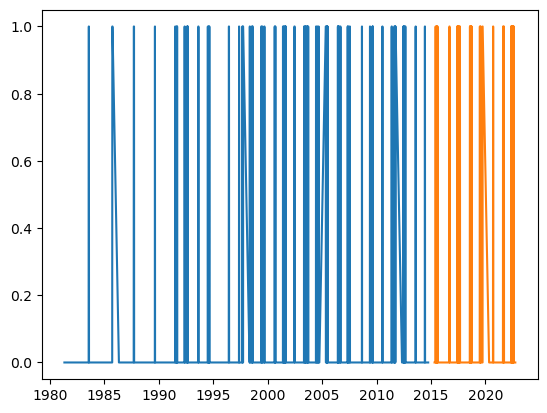

In [ ]:
train_dataset = dataset.iloc[train_indices]
test_dataset = dataset.iloc[test_indices]


plt.plot(train_dataset.index, train_dataset['Target'], label='Train')
plt.plot(test_dataset.index, test_dataset['Target'], label='Test')

In [ ]:
from functions import forecast_models

In [ ]:
time_lags = np.repeat(30,pred_dataframe.shape[1])
time_sequences = np.repeat(15,pred_dataframe.shape[1])
variable_selection = np.repeat(1,pred_dataframe.shape[1])
ts_length = 15

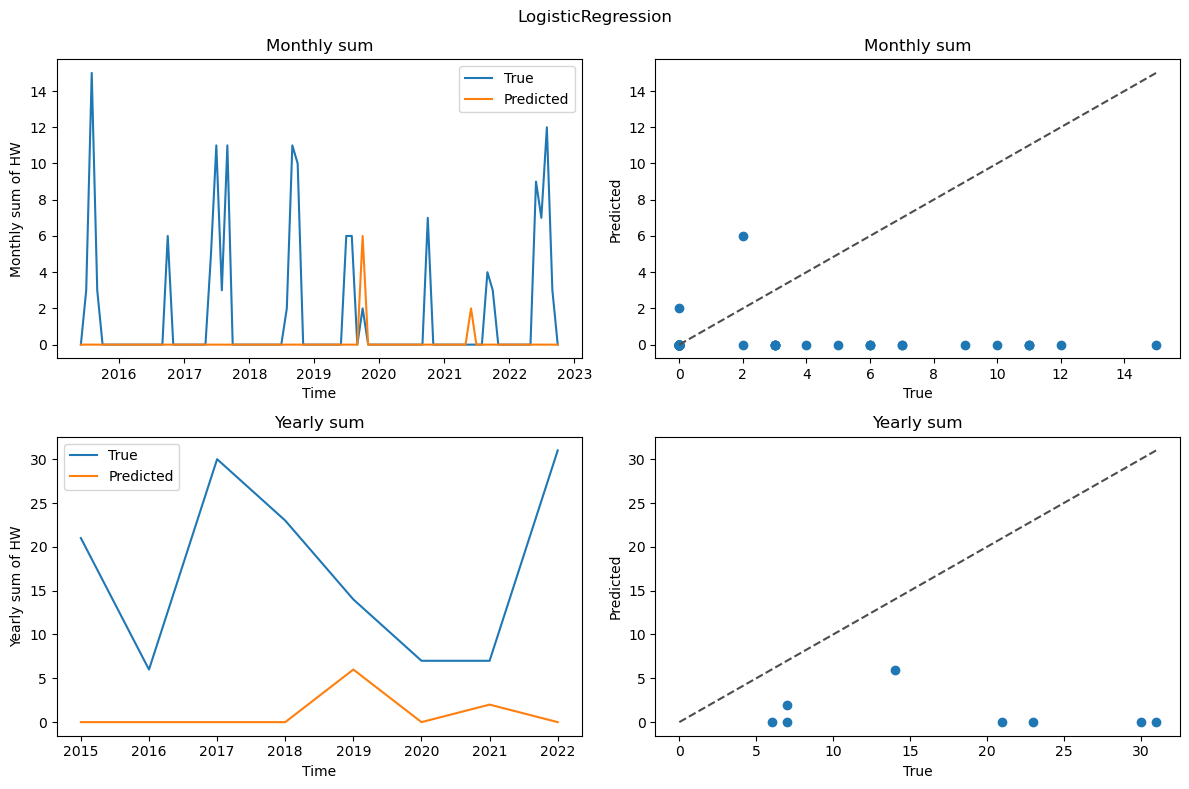

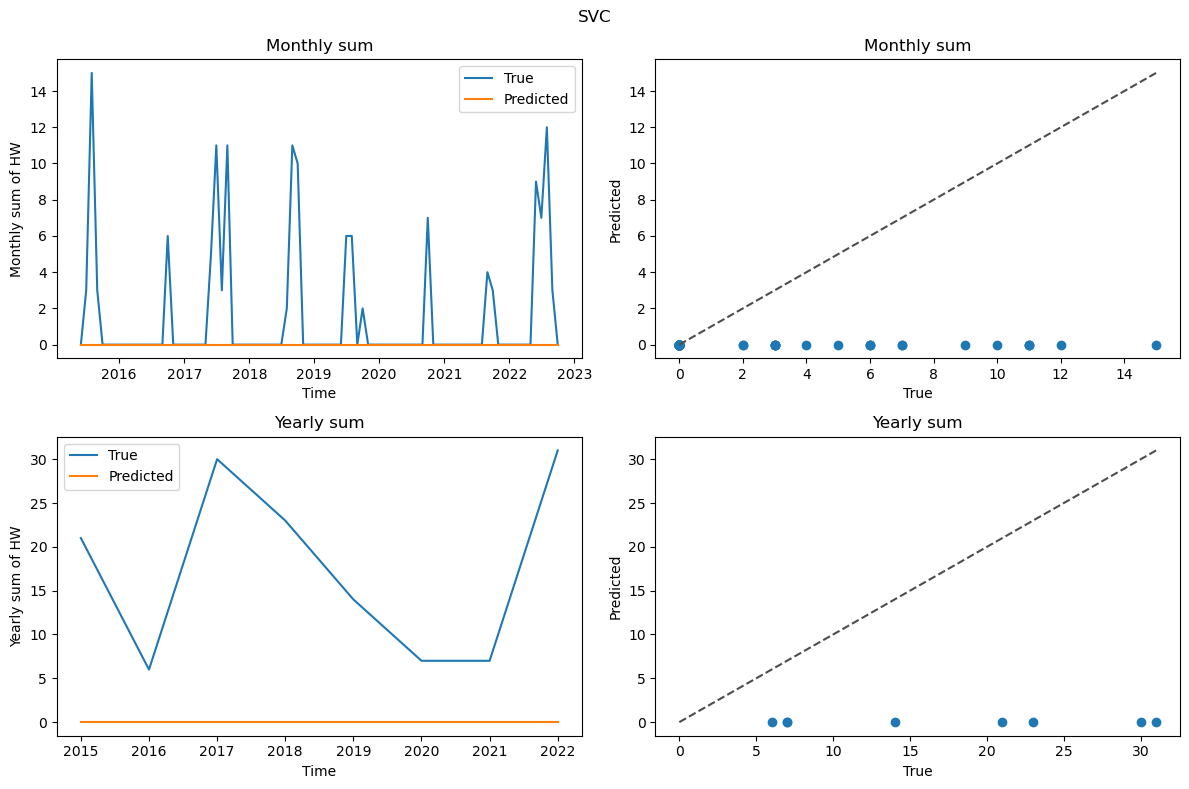

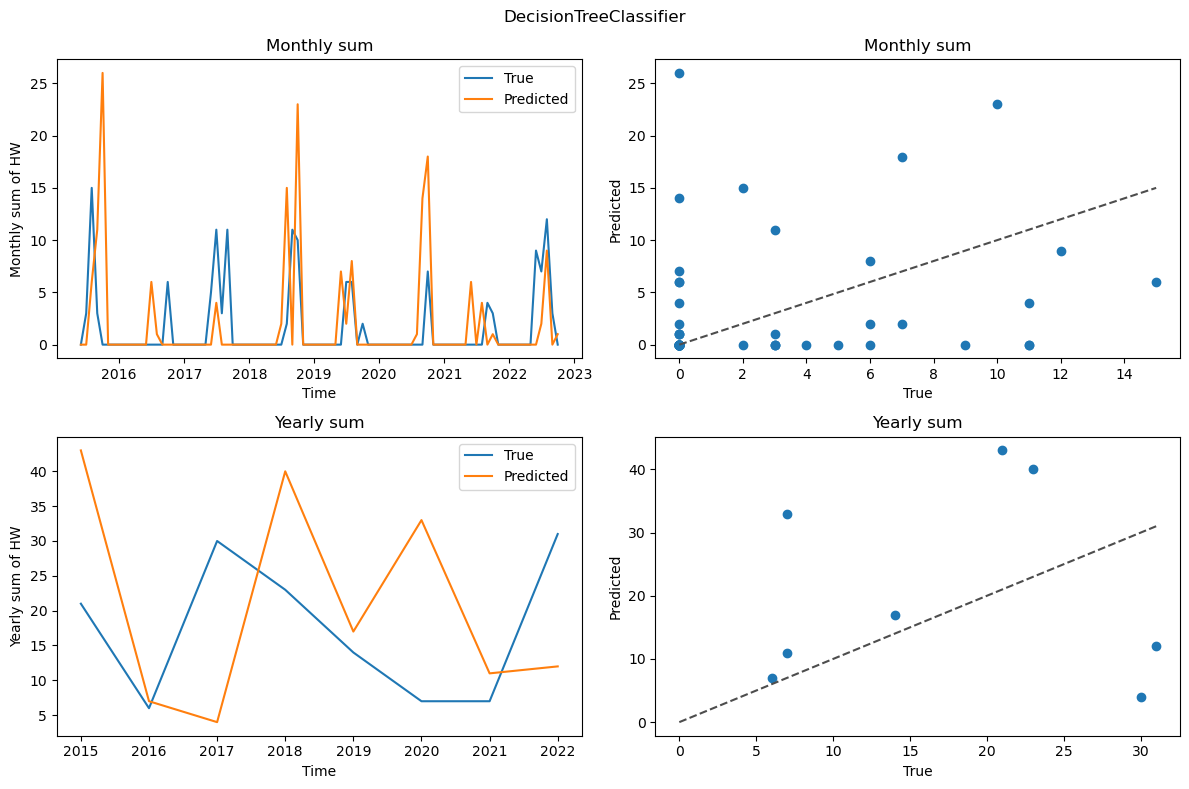

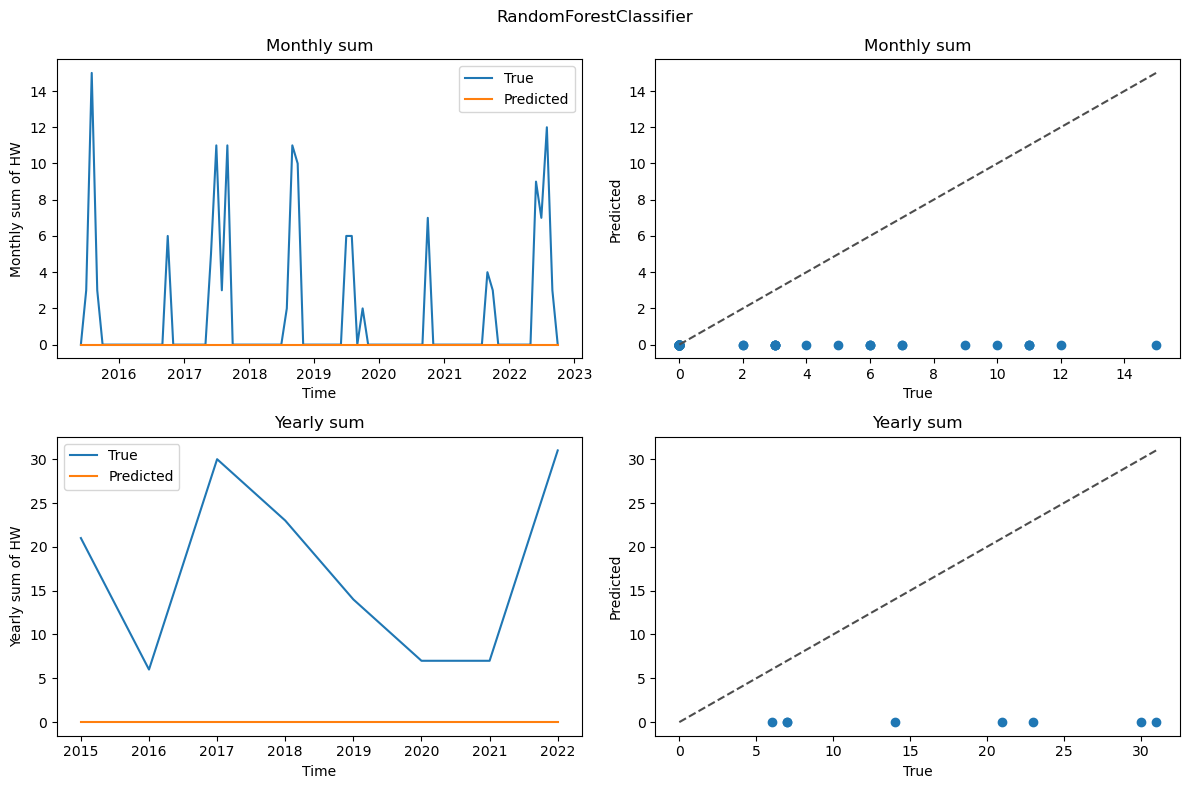

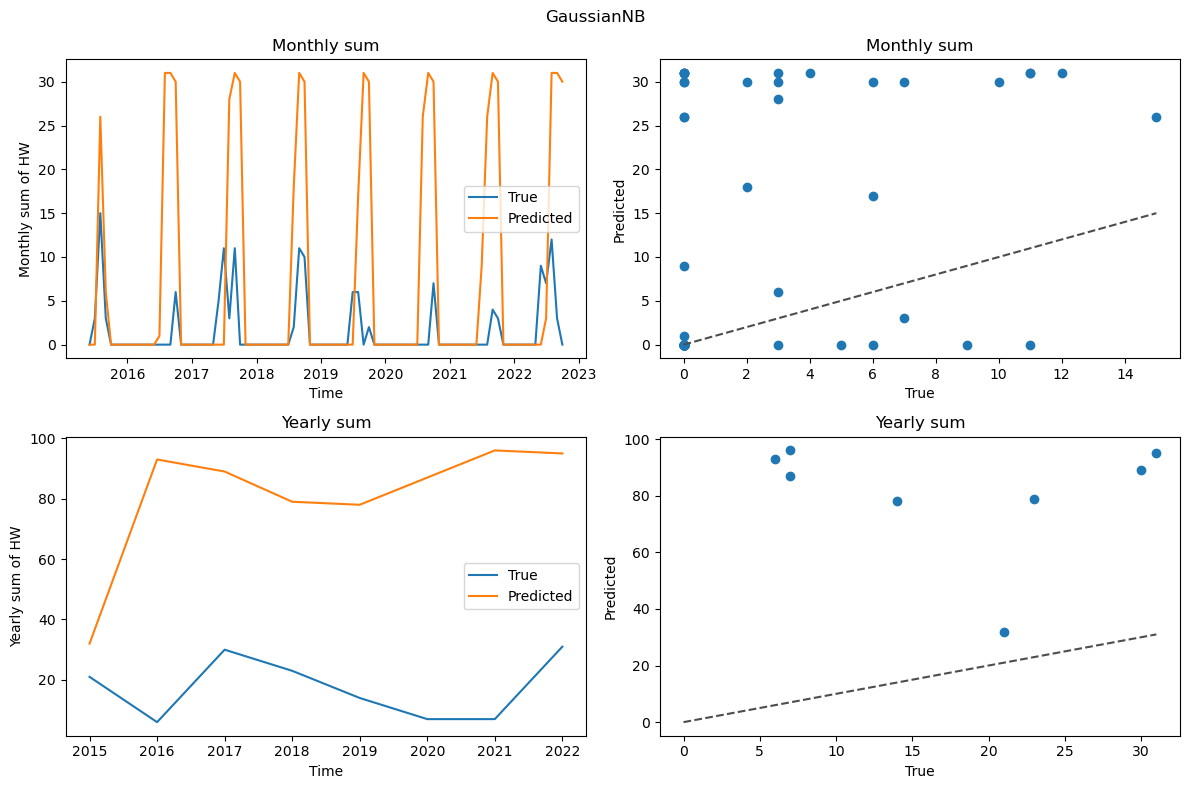

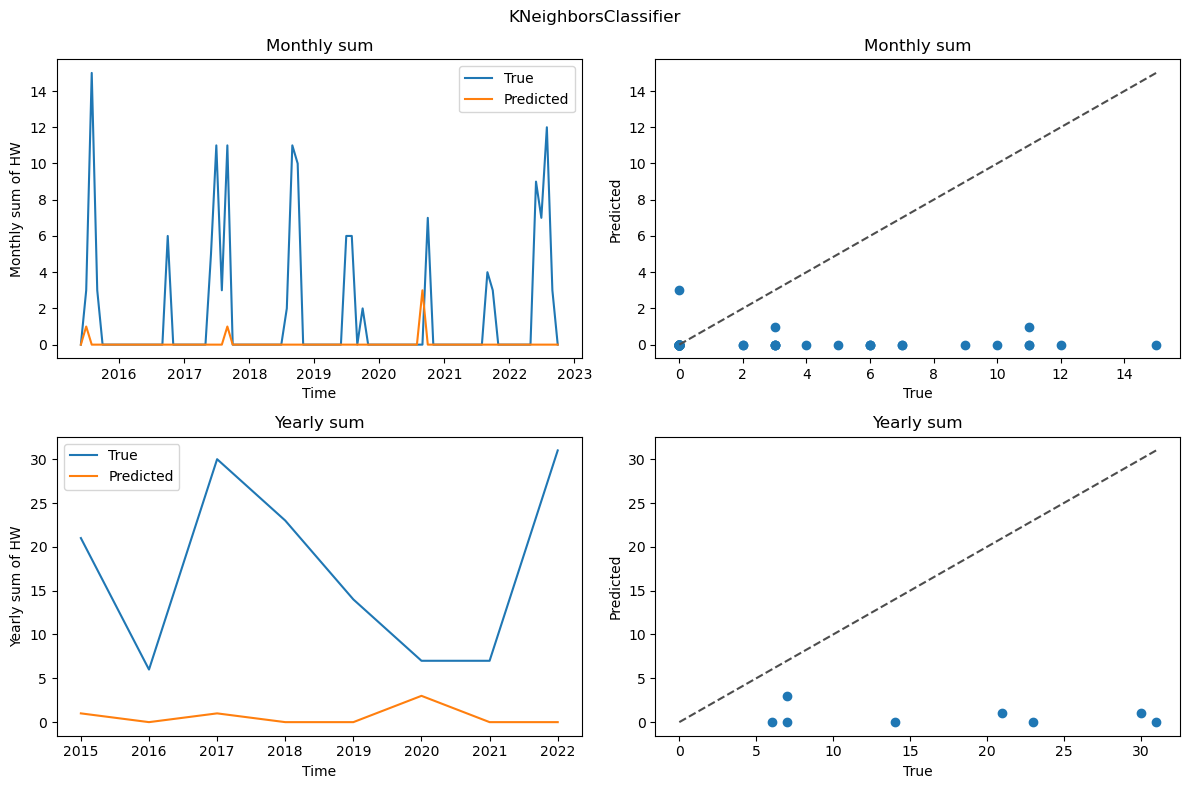

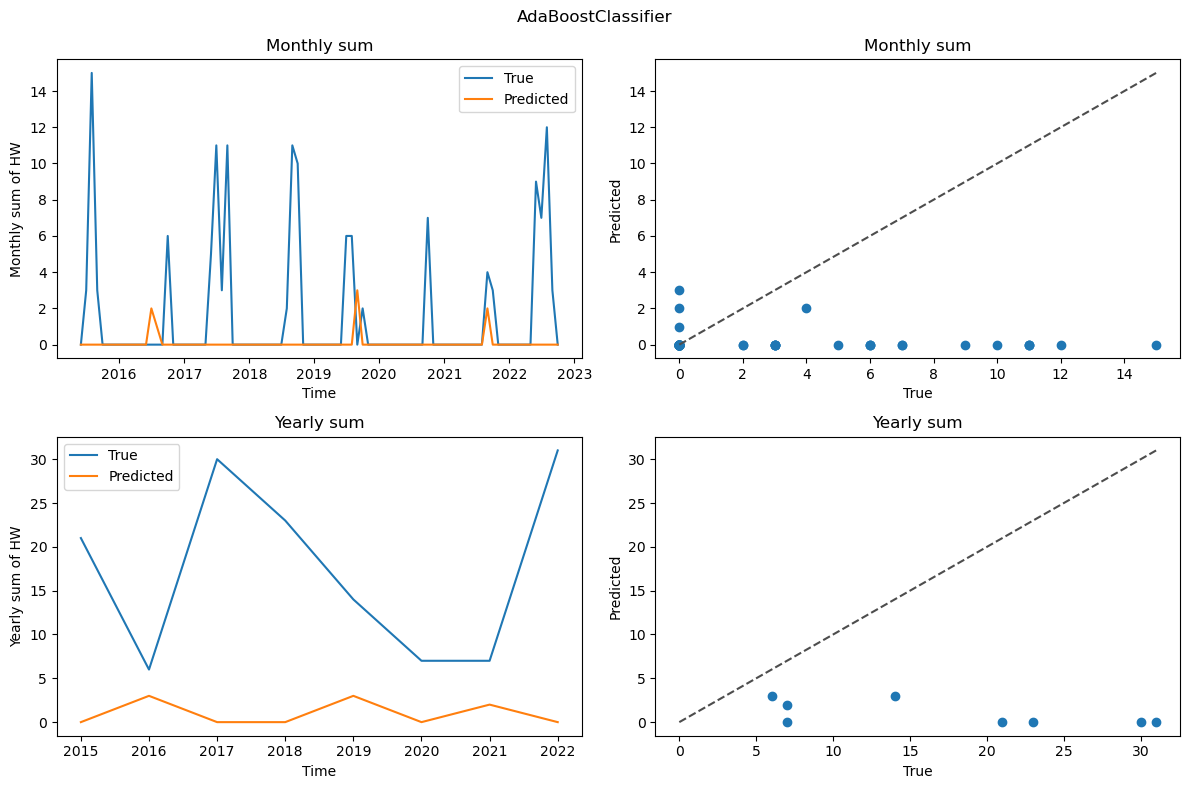

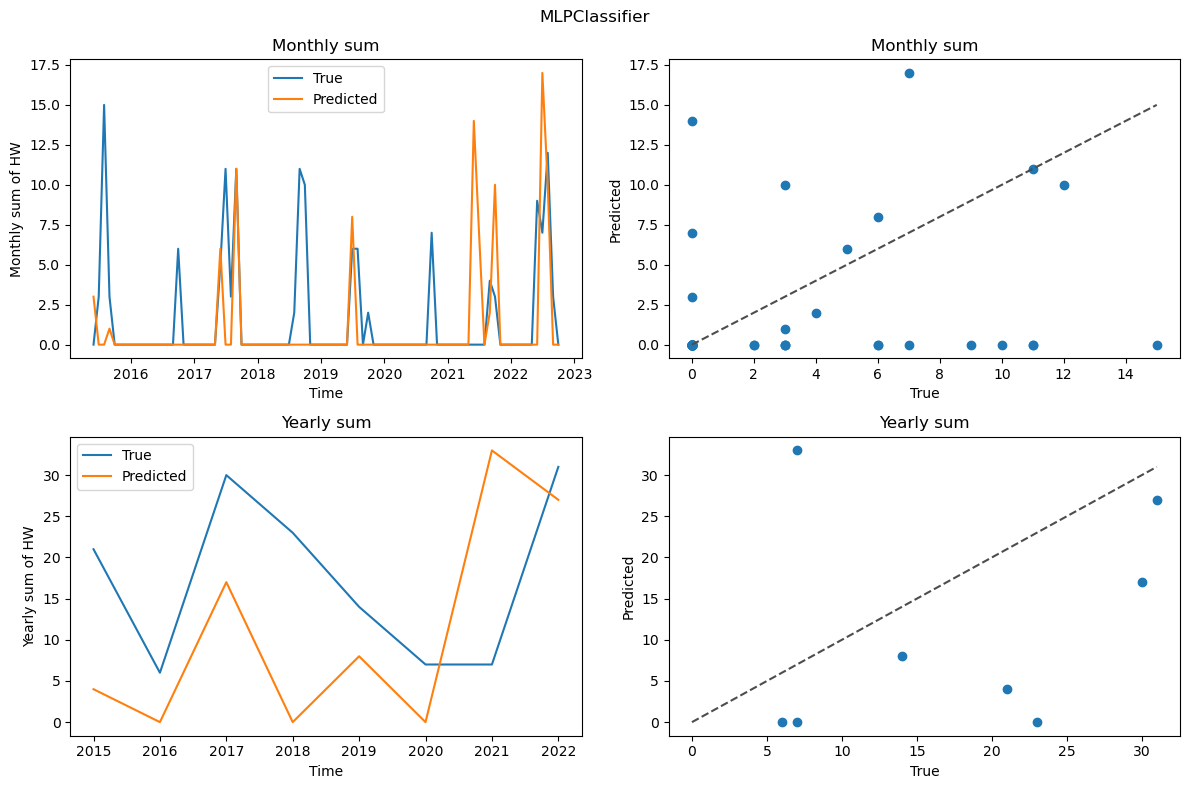

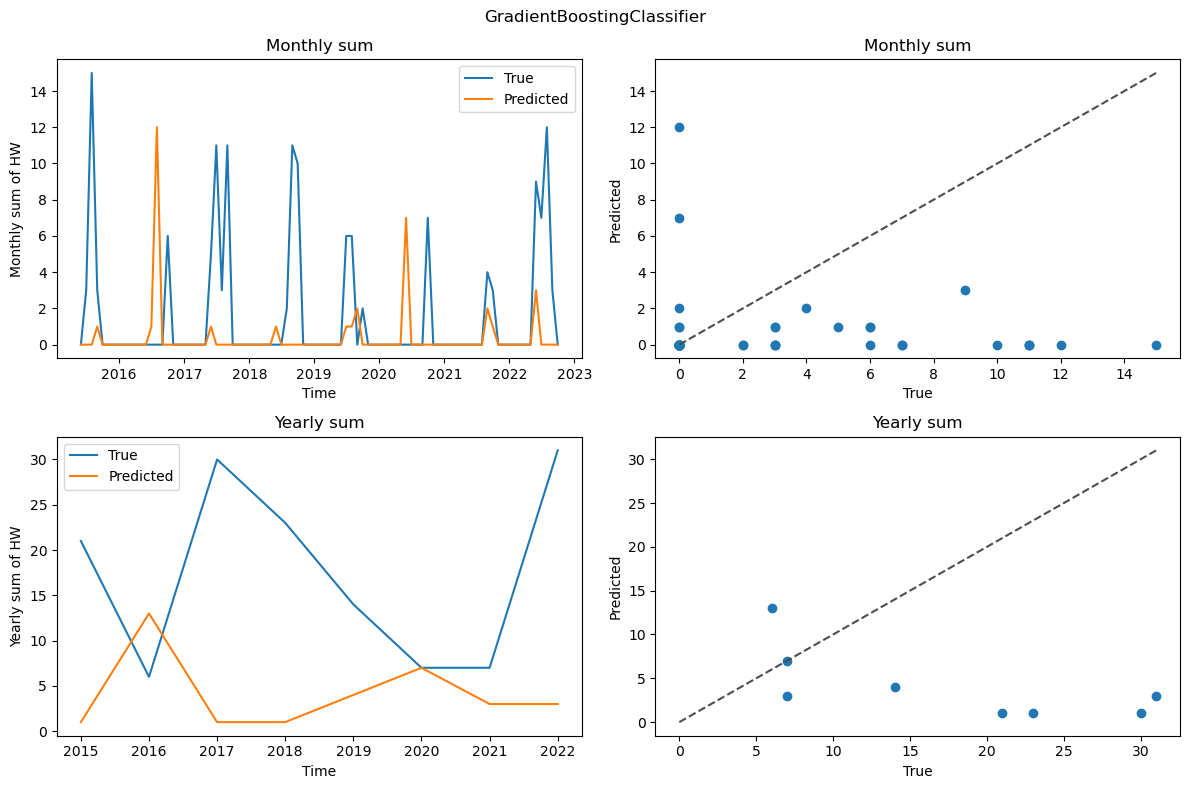

39/39 [==============================] - 1s 6ms/step


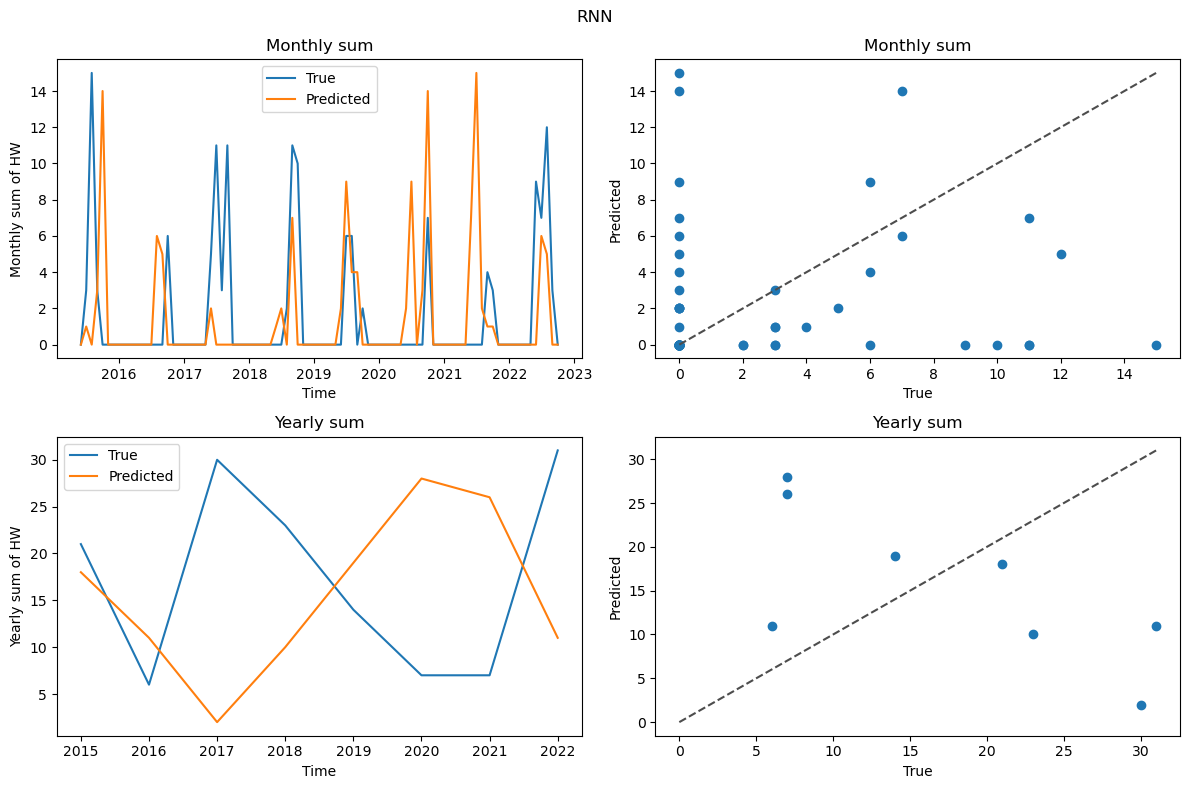

39/39 [==============================] - 2s 10ms/step


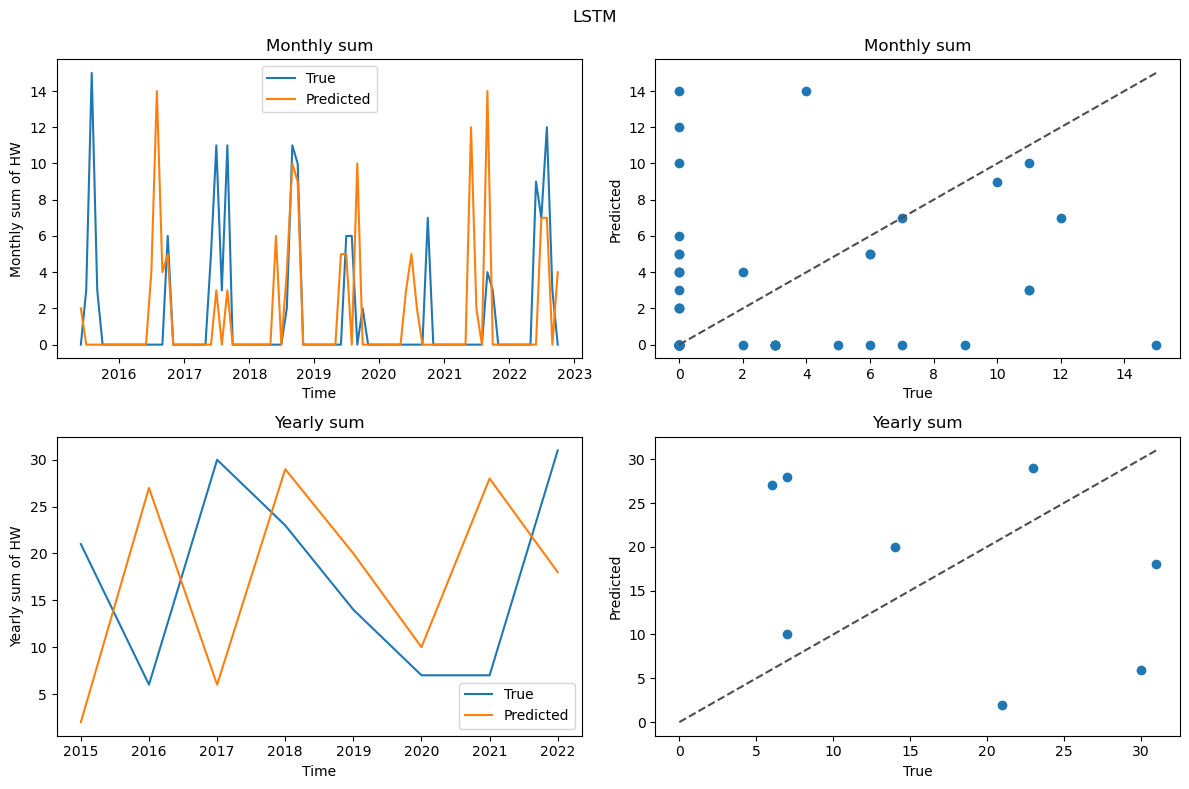

39/39 [==============================] - 2s 8ms/step


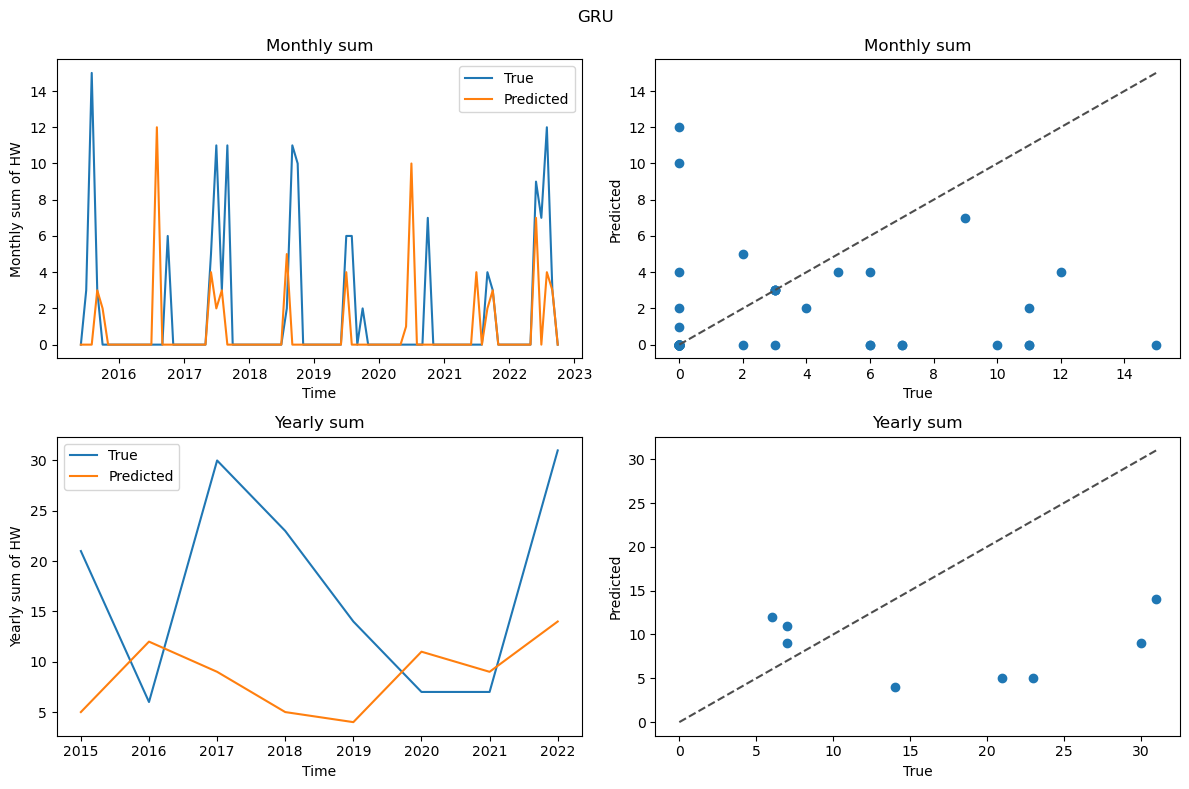

39/39 [==============================] - 0s 3ms/step


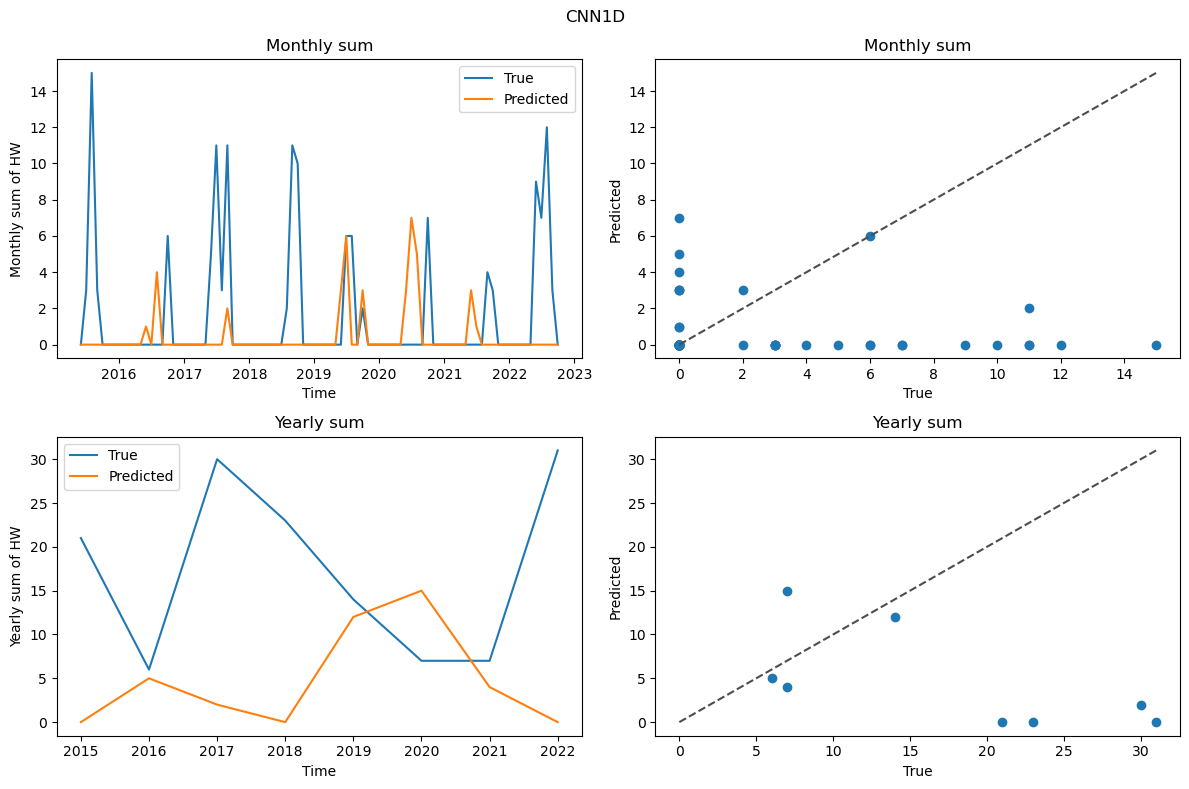

39/39 [==============================] - 1s 14ms/step


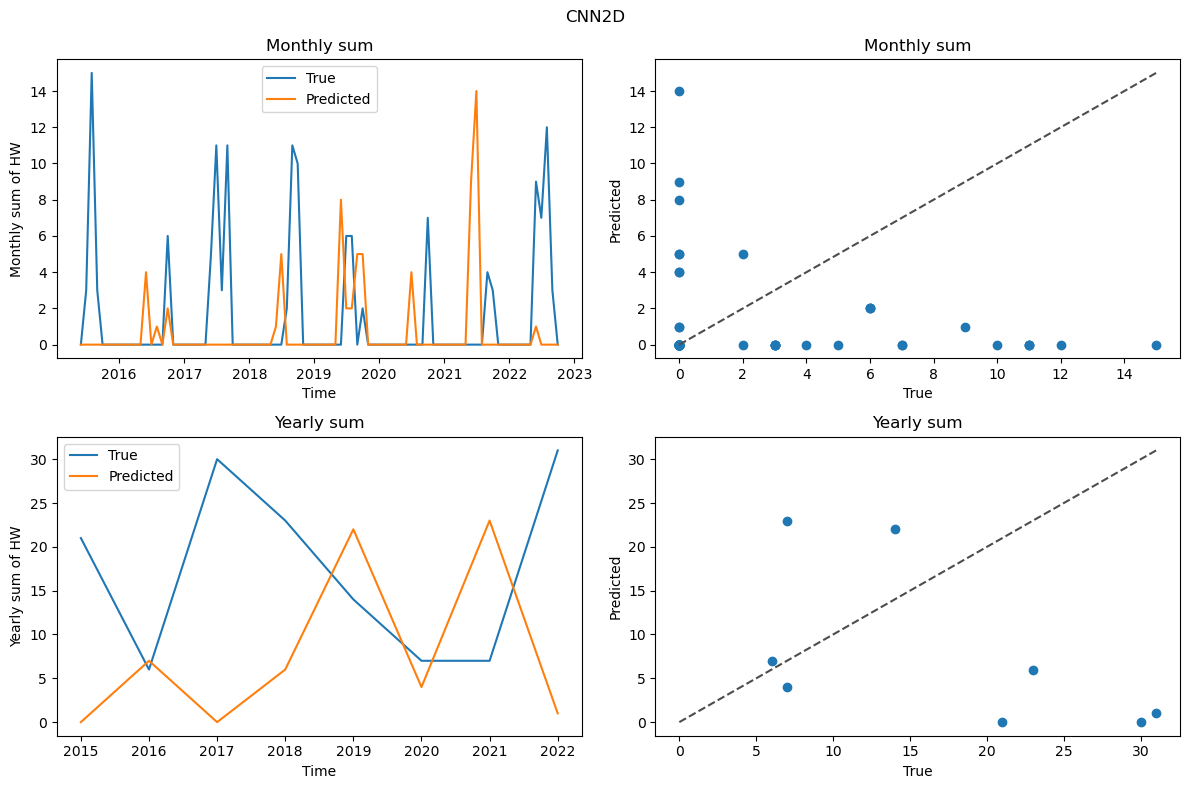

In [ ]:
Y_column = 'Target'
Results_folder = 'test_0507'
input_average = True


results_1 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
# results_2 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
# results_3 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
# results_4 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
# results_5 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)

# results_concat=pd.concat([results_1,results_2,results_3,results_4,results_5],axis=0)
# results_av=results_concat.groupby(results_concat.index).mean()
# results_av.index = results_1['Method']
# results_av.loc['Average'] = results_av.mean()
# results_av.loc['Max'] = results_av.max()
# results_av.loc['Min'] = results_av.min()

# results_av

In [ ]:
results_av

Recall  Precision  F1-score   HW-Diff  \
Method                                                                
LogisticRegression          0.000000   0.000000  0.000000  0.079137   
SVC                         0.000000   0.000000  0.000000  0.000000   
DecisionTreeClassifier      0.086331   0.058537  0.069767  1.474820   
RandomForestClassifier      0.000000   0.000000  0.000000  0.014388   
GaussianNB                  0.395683   0.110664  0.172956  3.575540   
KNeighborsClassifier        0.000000   0.000000  0.000000  0.014388   
AdaBoostClassifier          0.064748   0.120000  0.084112  0.539568   
MLPClassifier               0.071942   0.069930  0.070922  1.028777   
GradientBoostingClassifier  0.014388   0.031250  0.019704  0.460432   
RNN                         0.182734   0.123297  0.144089  1.454676   
LSTM                        0.083453   0.053515  0.064824  1.494964   
GRU                         0.116547   0.099337  0.104556  1.151079   
CNN1D                       0.067626   0.125099  0.085508  0.490647   
CNN2D                       0.044604   0.107683  0.062980  0.411511   
Average                     0.080576   0.064237  0.062816  0.870709   
Max                         0.395683   0.125099  0.172956  3.575540   
Min                         0.000000   0.000000  0.000000  0.000000   

                            Month_MAE   Year_MAE   Month_R2    Year_R2  
Method                                                                  
LogisticRegression           3.750000  17.000000  -0.750745  -3.193732  
SVC                          3.475000  17.375000  -0.661701  -3.237976  
DecisionTreeClassifier       6.750000  17.500000  -3.989212  -4.411094  
RandomForestClassifier       3.425000  17.125000  -0.628823  -3.205799  
GaussianNB                  12.350000  44.750000 -14.844378 -22.827049  
KNeighborsClassifier         3.525000  17.125000  -0.667180  -3.205799  
AdaBoostClassifier           3.950000  12.500000  -0.800062  -1.445450  
MLPClassifier                5.600000  13.750000  -2.268605  -1.692140  
GradientBoostingClassifier   4.025000  12.125000  -0.897325  -1.360985  
RNN                          5.040000  15.050000  -1.575979  -2.643506  
LSTM                         5.650000  17.799999  -2.531628  -4.214815  
GRU                          4.695000  14.075000  -1.353779  -2.149858  
CNN1D                        3.860000  14.200000  -0.655399  -2.021954  
CNN2D                        3.895000  13.875000  -0.664989  -2.001307  
Average                      4.999286  17.446428  -2.306415  -4.115105  
Max                         12.350000  44.750000  -0.628823  -1.360985  
Min                          3.425000  12.125000 -14.844378 -22.827049

In [ ]:
lower_bounds = np.repeat(0,pred_dataframe.shape[1])
upper_bounds = np.repeat(1,pred_dataframe.shape[1])
bounds = np.vstack((lower_bounds,upper_bounds)).T

In [ ]:
pred_dataframe.to_csv('./Predictors/pred_dataframe.csv')
target_dataset[train_indices].to_csv('./Predictors/target_dataset.csv')

In [ ]:
first_year = train_dataset.index.year[0]+1
last_year = train_dataset.index.year[-1]

year_difference = last_year - first_year


train_limit = round(0.80*year_difference)

train_indices_opt = (train_dataset.index.year >=first_year) & (train_dataset.index.year <=first_year + train_limit)
val_indices_opt = (train_dataset.index.year >first_year + train_limit) & (train_dataset.index.year <=last_year)

In [ ]:
pd.DataFrame(train_indices_opt).to_csv('./Predictors/train_indices_opt.csv', index=False)
pd.DataFrame(val_indices_opt).to_csv('./Predictors/val_indices_opt.csv', index=False)

In [ ]:
def fitness_func(solution):
    
    # Read data
    import pandas as pd
    pred_dataframe_opt = pd.read_csv('./Predictors/pred_dataframe.csv', index_col=0)
    pred_dataframe_opt.index = pd.to_datetime(pred_dataframe_opt.index)
    target_dataset_opt = pd.read_csv('./Predictors/target_dataset.csv', index_col=0)
    target_dataset_opt.index = pd.to_datetime(target_dataset_opt.index)
    train_indices_opt = np.array(pd.read_csv('./Predictors/train_indices_opt.csv'))
    val_indices_opt = np.array(pd.read_csv('./Predictors/val_indices_opt.csv'))

    # Read solution
    # time_lags = np.array(solution).astype(int)
    # time_sequences = np.repeat(7,pred_dataframe.shape[1])

    time_lags = np.repeat(30,pred_dataframe_opt.shape[1])
    time_sequences = np.repeat(7,pred_dataframe_opt.shape[1])
    variable_selection = np.array(solution).round().astype(int)
    # print(solution)
    if sum(variable_selection) == 0:
        return 100000


    # Create dataset according to solution
    dataset_opt = target_dataset_opt.copy()
    for i,col in enumerate(pred_dataframe_opt.columns):
        if variable_selection[i] == 0:
            continue
        for j in range(time_sequences[i]):
            dataset_opt[str(col)+'_lag'+str(time_lags[i]+j)] = pred_dataframe_opt[col].shift(time_lags[i]+j)
        # dataset_opt[str(col)+'av'] = np.average(dataset_opt[[str(col)+'_lag'+str(time_lags[i]+j) for j in range(time_sequences[i])]], axis=1)
        # dataset_opt.drop([str(col)+'_lag'+str(time_lags[i]+j) for j in range(time_sequences[i])], axis=1, inplace=True)

        
    # Split dataset into train and validation
    train_dataset_opt = dataset_opt.iloc[train_indices_opt]
    val_dataset_opt = dataset_opt.iloc[val_indices_opt]

    # Standardize data

    Y_column = 'Target' 
        
    X_train=train_dataset_opt[train_dataset_opt.columns.drop([Y_column]) ]
    Y_train=train_dataset_opt[Y_column]

    X_val=val_dataset_opt[val_dataset_opt.columns.drop([Y_column]) ]
    Y_val=val_dataset_opt[Y_column]
        
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler()
    X_std_train = scaler.fit(X_train)

    X_std_train = scaler.transform(X_train)
    X_std_val = scaler.transform(X_val)

    X_train=pd.DataFrame(X_std_train,columns=X_train.columns,index=X_train.index)
    X_val=pd.DataFrame(X_std_val,columns=X_val.columns,index=X_val.index)


    # Train model
    from sklearn.metrics import f1_score, mean_absolute_error
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    # from sklearn.ensemble import AdaBoostClassifier
    # clf = AdaBoostClassifier(n_estimators=50, random_state=0)
    # from sklearn.naive_bayes import GaussianNB
    # clf = GaussianNB()
    clf.fit(X_train, Y_train)
    # Y_pred = clf.predict(X_val)
    predictions = clf.predict(X_val)
    Y_pred = pd.DataFrame(predictions, columns=['Y_pred'], index=Y_val.index)

    #Calculate monthly and yearly sums
    monthly_sum_test = Y_val.resample('M').sum()
    monthly_sum_pred = Y_pred.resample('M').sum()
    monthly_sum_test = monthly_sum_test[monthly_sum_test.index.month.isin([5, 6, 7, 8, 9])]
    monthly_sum_pred = monthly_sum_pred[monthly_sum_pred.index.month.isin([5, 6, 7, 8, 9])]
    # Return f1 score
    month_MAE = mean_absolute_error(monthly_sum_test, monthly_sum_pred)
    score = f1_score(Y_val, Y_pred)
    print(score,month_MAE)
    return 1/score

In [ ]:
from scipy.optimize import differential_evolution

In [ ]:
for i in range(1):
    result = differential_evolution(fitness_func, bounds, maxiter=20,popsize=15,disp=True,workers=1)
    # result.x.tofile(f'./Results/results_DE_AB_{10}.csv', sep=',')  


0.0 2.3666666666666667
0.041666666666666664 3.0
0.0 2.8
0.0 2.3666666666666667
0.0 2.533333333333333
0.0 2.2666666666666666
0.0 2.5
0.0 2.3666666666666667
0.0 2.533333333333333
0.02631578947368421 2.2
0.0 2.3666666666666667
0.0 3.2333333333333334
0.0 2.3666666666666667
0.0 2.533333333333333
0.0 2.7
0.024096385542168676 2.3
0.0 2.3666666666666667
0.04938271604938272 2.433333333333333
0.0 2.3666666666666667
0.0 2.3666666666666667
0.0 2.433333333333333
0.0 2.2
0.07058823529411765 2.3666666666666667
0.0 2.3666666666666667
0.0 2.4
0.0 2.6666666666666665
0.05128205128205127 2.4
0.023255813953488372 2.4
0.0 2.433333333333333
0.02469135802469136 2.2333333333333334
0.02531645569620253 2.433333333333333
0.0 2.566666666666667
0.0 2.8
0.04819277108433735 2.1
0.0 2.4
0.0 2.3666666666666667
0.0 2.3666666666666667
0.0 2.3666666666666667
0.0 2.566666666666667
0.07207207207207207 3.3666666666666667
0.0 2.3333333333333335
0.0 2.8
0.027397260273972605 2.3
0.0 2.3
0.0 2.4
0.0 2.533333333333333
0.067415730

In [ ]:
result.x.tofile(f'./Results/results_DE_test0707_LR_Lags_F1.csv', sep=',')

In [ ]:
time_sequences = np.repeat(7,pred_dataframe.shape[1])
ts_length = 7
variable_selection = np.repeat(1,pred_dataframe.shape[1])

time_lags = result.x.round().astype(int)

Y_column = 'Target'
Results_folder = 'test_0407__'

input_average = False


results_1 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
results_2 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
results_3 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
results_4 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)
results_5 = forecast_models(pred_dataframe,target_dataset,train_indices,test_indices,Y_column,time_lags,ts_length,time_sequences,variable_selection,Results_folder,input_average)

results_concat=pd.concat([results_1,results_2,results_3,results_4,results_5],axis=0)
results_av=results_concat.groupby(results_concat.index).mean()
results_av.index = results_1['Method']
results_av.loc['Average'] = results_av.mean()
results_av.loc['Max'] = results_av.max()
results_av.loc['Min'] = results_av.min()

results_av

In [ ]:
results